# PAYS LES PLUS DANGEREUX POUR LES FEMMES EN 2023

## Installation & Import

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Création du DataFrame de base

In [2]:
data = pd.read_csv("most-dangerous-countries-for-women-2024.csv", sep=",", low_memory=False)

In [3]:
# Le séparateur est ","

In [4]:
data_exo = data

In [5]:
# Suppresion de "MostDangerousCountriesForWomen_" devant chaque catégories pour que le DF soit plus lisible
data_exo.columns = data_exo.columns.str.replace("MostDangerousCountriesForWomen_", "", regex=False)


In [6]:
data_exo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                176 non-null    object 
 1   WomenPeaceAndSecurityIndex_Score_2023  176 non-null    float64
 2   WomensDangerIndexWDI_TotalScore_2019   50 non-null     float64
 3   WDIStreetSafety_2019                   50 non-null     float64
 4   WDIIntentionalHomicide_2019            50 non-null     float64
 5   WDINonPartnerViolence_2019             50 non-null     float64
 6   WDIIntimatePartnerViolence_2019        50 non-null     float64
 7   WDILegalDiscrimination_2019            50 non-null     float64
 8   WDIGlobalGenderGap_2019                50 non-null     float64
 9   WDIGenderInequality_2019               50 non-null     float64
 10  WDIAttitudesTowardViolence_2019        50 non-null     float64
 11  contin

In [7]:
data_exo.describe().T

,count,mean,std,min,25%,50%,75%,max
WomenPeaceAndSecurityIndex_Score_2023,176.0,0.68033,0.148371,0.286,0.5815,0.6915,0.7965,0.932
WomensDangerIndexWDI_TotalScore_2019,50.0,413.01160,122.215655,212.040,312.6025,394.5350,514.9000,771.820
WDIStreetSafety_2019,50.0,53.74000,21.562259,9.000,40.2500,54.0000,68.0000,100.000
WDIIntentionalHomicide_2019,50.0,15.56000,18.417117,3.000,6.0000,9.5000,15.5000,100.000
WDINonPartnerViolence_2019,50.0,39.74000,24.287235,6.000,23.7500,30.0000,62.0000,100.000
WDIIntimatePartnerViolence_2019,50.0,51.84000,21.386969,14.000,32.2500,48.0000,65.5000,100.000
WDILegalDiscrimination_2019,50.0,36.44000,20.111079,15.000,22.0000,30.0000,43.2500,100.000
WDIGlobalGenderGap_2019,50.0,70.58000,13.800458,41.000,61.5000,71.5000,78.7500,100.000
WDIGenderInequality_2019,50.0,42.28000,28.747344,7.000,17.0000,38.5000,64.0000,100.000
WDIAttitudesTowardViolence_2019,50.0,33.98000,22.232987,7.000,20.0000,24.0000,51.7500,100.000


In [8]:
data_exo.describe(include="object").T

,count,unique,top,freq
country,176,176,Solomon Islands,1
continent,174,5,Africa,52


## Visualisation du taux de remplissage de chaque colonne

Liste des colonnes :

In [9]:
data_exo.columns

Index(['country', 'WomenPeaceAndSecurityIndex_Score_2023',
       'WomensDangerIndexWDI_TotalScore_2019', 'WDIStreetSafety_2019',
       'WDIIntentionalHomicide_2019', 'WDINonPartnerViolence_2019',
       'WDIIntimatePartnerViolence_2019', 'WDILegalDiscrimination_2019',
       'WDIGlobalGenderGap_2019', 'WDIGenderInequality_2019',
       'WDIAttitudesTowardViolence_2019', 'continent'],
      dtype='object')

On notera que la totalité des données, hormis celle de l'indice de Paix & Sécurité, datent de 2019

In [10]:
# Calculer le taux de remplissage pour chaque colonne
column_fill_rates = data_exo.notna().mean() * 100

# Afficher le taux de remplissage pour chaque colonne
column_fill_rates

country                                  100.000000
WomenPeaceAndSecurityIndex_Score_2023    100.000000
WomensDangerIndexWDI_TotalScore_2019      28.409091
WDIStreetSafety_2019                      28.409091
WDIIntentionalHomicide_2019               28.409091
WDINonPartnerViolence_2019                28.409091
WDIIntimatePartnerViolence_2019           28.409091
WDILegalDiscrimination_2019               28.409091
WDIGlobalGenderGap_2019                   28.409091
WDIGenderInequality_2019                  28.409091
WDIAttitudesTowardViolence_2019           28.409091
continent                                 98.863636
dtype: float64

Seule la colonne concernant l'indice de sécurité est totalement remplie.
Nous allons donc lister les pays dans lesquelles seule cette colonne est remplie
Nous allons donc commencer par regarder cet indice, puis écarter les pays qui ont uniquement cette colonne de remplie

## Visualisation de "WomenPeaceAndSecurityIndex_score_2023"

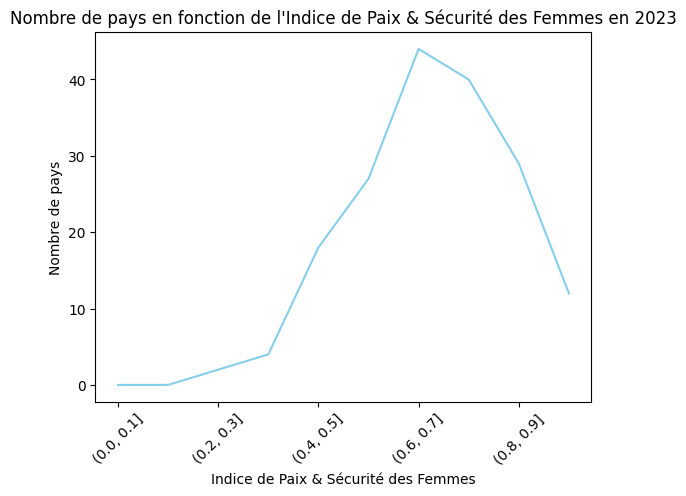

In [11]:
# Créez le DataFrame
women_security_2023 = pd.DataFrame(data_exo, columns=["country", "WomenPeaceAndSecurityIndex_Score_2023", "continent"])

# Convertissez les scores en valeurs numériques, en remplaçant les valeurs invalides par NaN
women_security_2023["WomenPeaceAndSecurityIndex_Score_2023"] = pd.to_numeric(
    women_security_2023["WomenPeaceAndSecurityIndex_Score_2023"], errors='coerce'
)

# Définissez les seuils de 0.1 à 1.0
bins = [i / 10 for i in range(0, 11)]

# Comptez le nombre de pays dans chaque intervalle
counts = pd.cut(women_security_2023["WomenPeaceAndSecurityIndex_Score_2023"], bins=bins).value_counts().sort_index()

# Tracez le graphique en barres
counts.plot( color='skyblue')
plt.xlabel("Indice de Paix & Sécurité des Femmes")
plt.ylabel("Nombre de pays")
plt.title("Nombre de pays en fonction de l'Indice de Paix & Sécurité des Femmes en 2023")
plt.xticks(rotation=45)
plt.show()


On remarque que la majorité des pays ont un indice compris entre **0.55 et 0.75**

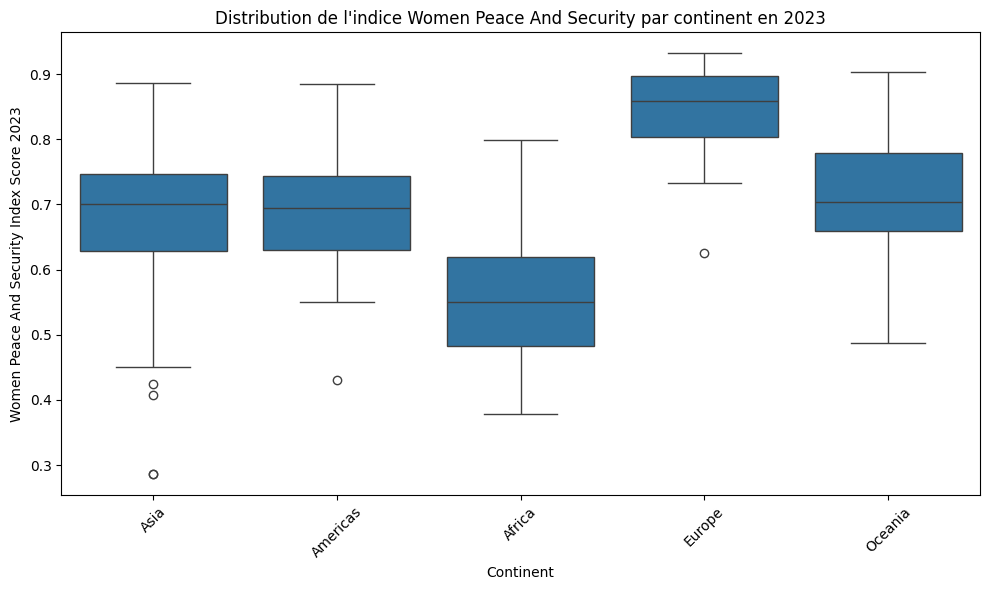

In [12]:
df = pd.DataFrame(data_exo)

# Créer un diagramme box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='WomenPeaceAndSecurityIndex_Score_2023', data=df)

# Personnalisation du graphique
plt.title("Distribution de l'indice Women Peace And Security par continent en 2023")
plt.xlabel("Continent")
plt.ylabel("Women Peace And Security Index Score 2023")
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

On remarque que l'**Europe** est le continent où l'indice de Sécurité des Femmes est le plus elevé en 2023, à l'exception d'un pays.

In [13]:
data_europe_dangerous = women_security_2023[women_security_2023['continent'] == 'Europe']
max_europe_danger = data_europe_dangerous.sort_values(by="WomenPeaceAndSecurityIndex_Score_2023", ascending=True)
max_europe_danger.head(1)

,country,WomenPeaceAndSecurityIndex_Score_2023,continent
41,Ukraine,0.626,Europe


Le pays Européen avec l'indice de Sécurité le plus faible est l'**Ukraine**. On peut supposer que si l'indice est si bas, c'est à cause de l'actualité géopolitique du pays.  
- [Guerre Russo-Ukrainienne](https://fr.wikipedia.org/wiki/Guerre_russo-ukrainienne) 

In [14]:
data_asia_dangerous = women_security_2023[women_security_2023['continent'] == 'Asia']
max_asia_danger = data_asia_dangerous.sort_values(by="WomenPeaceAndSecurityIndex_Score_2023", ascending=True)
max_asia_danger.head(3)

,country,WomenPeaceAndSecurityIndex_Score_2023,continent
35,Afghanistan,0.286,Asia
36,Yemen,0.287,Asia
55,Syria,0.407,Asia


Les 3 pays d'**Asie** ayant l'indice de sécurité les plus faibles sont : l'**Afghanistan**, le **Yemen**, la **Syrie**.
On notera, que comme en **Ukraine**, le **Yemen** et la **Syrie** sont en guerre. On peut supposer que l'indice de l'**Afghanistan** soit faible en raison des nombreuses guerres ayant eu lieu ces dernières années.
- [Guerre Civile Yéménite](https://fr.wikipedia.org/wiki/Guerre_civile_y%C3%A9m%C3%A9nite) 
- [Guerre Civil Syrienne](https://fr.wikipedia.org/wiki/Guerre_civile_syrienne) 
- [Guerres d'Afghanistan](https://fr.wikipedia.org/wiki/Guerre_d%27Afghanistan#:~:text=la%20guerre%20d'Afghanistan%2C%20de%202001%20%C3%A0%202021%2C%20est,am%C3%A9ricain%20et%20une%20victoire%20talibane.) 

In [15]:
data_americas_dangerous = women_security_2023[women_security_2023['continent'] == 'Americas']
max_americas_danger = data_americas_dangerous.sort_values(by="WomenPeaceAndSecurityIndex_Score_2023", ascending=True)
max_americas_danger.head(3)

,country,WomenPeaceAndSecurityIndex_Score_2023,continent
80,Haiti,0.431,Americas
10,Mexico,0.551,Americas
109,El Salvador,0.566,Americas


Les 3 pays d'**Amérique** ayant les indices de Sécurité les plus faibles sont **Haïti**, le **Mexique** et le **Salvador**.  
Ces 3 pays sont connus par la présence prépondérante de gang et de cartel de la drogue.

In [16]:

widpc_max = women_security_2023["WomenPeaceAndSecurityIndex_Score_2023"].max()


women_danger_2023_max = women_security_2023.sort_values(by="WomenPeaceAndSecurityIndex_Score_2023", ascending=False)
women_danger_2023_max.head(1)

,country,WomenPeaceAndSecurityIndex_Score_2023,continent
111,Denmark,0.932,Europe


In [17]:

widpc_min = women_security_2023["WomenPeaceAndSecurityIndex_Score_2023"].min()


women_danger_2023_min = women_security_2023.sort_values(by="WomenPeaceAndSecurityIndex_Score_2023", ascending=True)
women_danger_2023_min.head(1)

,country,WomenPeaceAndSecurityIndex_Score_2023,continent
35,Afghanistan,0.286,Asia


In [18]:
women_danger_france =  women_security_2023[ women_security_2023['country'] == 'France']
women_danger_france

,country,WomenPeaceAndSecurityIndex_Score_2023,continent
22,France,0.864,Europe


In [19]:
women_danger_mean =  women_security_2023["WomenPeaceAndSecurityIndex_Score_2023"].mean()
women_danger_mean.round(4)

0.6803

Le pays ayant l'indice de Sécurité le plus élevé est le **Danemark** en **Europe**, et le pays ayant l'indice le plus faible est l'**Afghanistan** en **Asie**.  
On notera que la **France** a un indice de sécurité de 0.864.  

In [20]:
# Obtenir la liste des continents uniques
continents_list = data["continent"].unique()

# Grouper par continent et compter le nombre de pays
countries_per_continent = data_exo.groupby("continent").size()

countries_table = countries_per_continent.reset_index(name="num_countries")
countries_table.rename(columns={"continent": "Continent"}, inplace=True)
countries_table

,Continent,num_countries
0,Africa,52
1,Americas,28
2,Asia,47
3,Europe,39
4,Oceania,8


In [21]:
# Regardons maintenant les pays qui n'ont que cette colonne de remplie

In [22]:
# Filtrer les pays où seule la colonne "WomenPeaceAndSecurityIndex_Score_2023" est remplie (avec 'country' et 'continent')
country_with_only_indice = data_exo[
    (data_exo.notna().sum(axis=1) == 3) &  # Seulement trois colonnes remplies ('country', 'continent', 'WomenPeaceAndSecurityIndex_Score_2023')
    (data_exo["WomenPeaceAndSecurityIndex_Score_2023"].notna())  # Cette colonne est non-NaN
]

# Obtenir le nombre de pays concernés par continent
countries_summary = (
    country_with_only_indice.groupby("continent")
    .size()
    .reset_index(name="num_countries")
    .rename(columns={"continent": "Continent"})
)

# Ajouter le total global comme ligne
total_countries = pd.DataFrame([{"Continent": "Total", "num_countries": len(country_with_only_indice)}])
countries_summary = pd.concat([countries_summary, total_countries], ignore_index=True)

# Afficher le tableau consolidé
countries_summary


,Continent,num_countries
0,Africa,48
1,Americas,21
2,Asia,31
3,Europe,18
4,Oceania,7
5,Total,125


In [23]:
# Total des pays par continent
countries_per_continent = (
    data_exo.groupby("continent")
    .size()
    .reset_index(name="total_countries")
    .rename(columns={"continent": "Continent"})
)

# Pays avec seulement "WomenPeaceAndSecurityIndex_Score_2023" rempli
countries_with_only_index = (
    country_with_only_indice.groupby("continent")
    .size()
    .reset_index(name="countries_with_index_only")
    .rename(columns={"continent": "Continent"})
)

# Fusion des deux DataFrames
combined_summary = pd.merge(
    countries_per_continent,
    countries_with_only_index,
    on="Continent",
    how="outer"
).fillna(0)  # Remplir les valeurs manquantes avec 0

# Calcul de la différence
combined_summary["difference"] = combined_summary["total_countries"] - combined_summary["countries_with_index_only"]

# Ajouter une ligne pour le total global
total_row = pd.DataFrame({
    "Continent": ["Total"],
    "total_countries": [combined_summary["total_countries"].sum()],
    "countries_with_index_only": [combined_summary["countries_with_index_only"].sum()],
    "difference": [combined_summary["difference"].sum()]
})

# Ajouter la ligne du total au tableau
combined_summary = pd.concat([combined_summary, total_row], ignore_index=True)

# Afficher le tableau final
combined_summary


,Continent,total_countries,countries_with_index_only,difference
0,Africa,52,48,4
1,Americas,28,21,7
2,Asia,47,31,16
3,Europe,39,18,21
4,Oceania,8,7,1
5,Total,174,125,49


Il y a *seulement 49 pays* qui pourront être analyser correctement. Il sera difficile d'avoir un résultat vraiment pertinent.

In [24]:
data_update= data_exo[~
    (data_exo.notna().sum(axis=1) == 3) &  # Seulement trois colonnes remplies ('country', 'continent', 'WomenPeaceAndSecurityIndex_Score_2023')
    (data_exo["WomenPeaceAndSecurityIndex_Score_2023"].notna())  # Cette colonne est non-NaN
]

## Visualisation "WomensDangerIndexWDI_TotalScore_2019"

**Nota:** plus le score est élevé, plus les femmes sont en danger.

In [25]:
women_danger_2019 = pd.DataFrame(data_update, columns=["country","continent", "WomensDangerIndexWDI_TotalScore_2019"])

In [26]:
women_danger_2019_sorted = women_danger_2019.sort_values(by="WomensDangerIndexWDI_TotalScore_2019", ascending=False)
women_danger_2019_sorted.head(10)

,country,continent,WomensDangerIndexWDI_TotalScore_2019
23,South Africa,Africa,771.82
6,Brazil,Americas,624.28
8,Russia,Europe,592.71
10,Mexico,Americas,576.05
16,Iran,Asia,553.11
83,Dominican Republic,Americas,551.32
12,Egypt,Africa,546.91
39,Morocco,Africa,542.75
0,India,Asia,541.25
19,Thailand,Asia,533.22


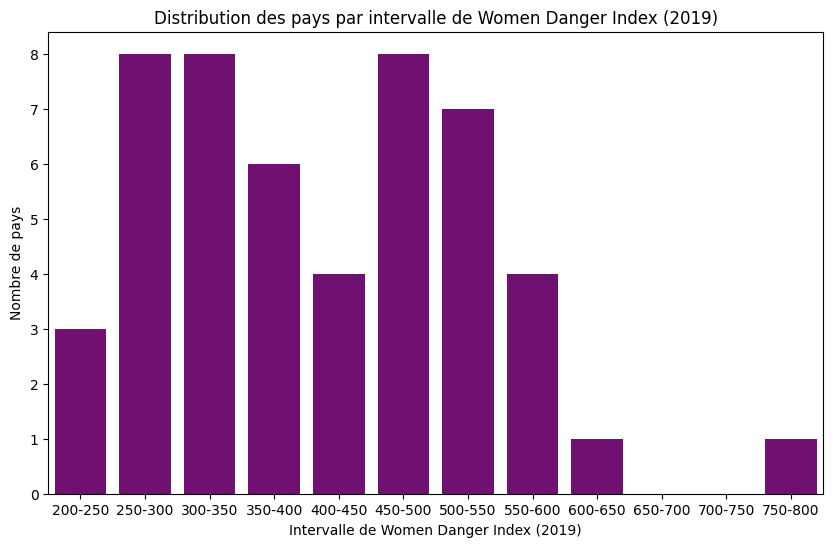

In [27]:
bins = [200, 250, 300, 350,  400, 450, 500, 550,  600,650,  700, 750, 800]
labels = ['200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-550', '550-600', '600-650', '650-700', '700-750', '750-800']

# Ajouter une colonne 'interval' au DataFrame en utilisant pd.cut()
women_danger_2019['interval'] = pd.cut(women_danger_2019["WomensDangerIndexWDI_TotalScore_2019"], bins=bins, labels=labels, right=False)

# Compter le nombre de pays dans chaque intervalle
interval_counts = women_danger_2019['interval'].value_counts().sort_index()

# Créer un graphique à barres sans `hue`
plt.figure(figsize=(10, 6))
sns.barplot(x=interval_counts.index, y=interval_counts.values, color="purple")

# Ajouter des labels et un titre
plt.xlabel("Intervalle de Women Danger Index (2019)")
plt.ylabel("Nombre de pays")
plt.yticks(range(0, int(interval_counts.values.max()) + 1, 1))
plt.title("Distribution des pays par intervalle de Women Danger Index (2019)")

# Afficher le graphique
plt.show()


In [28]:
# Filtrer pour les pays avec un indice inférieur à 300
data_exclude_interval = women_danger_2019.drop(columns=["interval"], errors='ignore')
indice_less_300 = data_exclude_interval[women_danger_2019["WomensDangerIndexWDI_TotalScore_2019"] < 300]

indice_less_300.sort_values(by="WomensDangerIndexWDI_TotalScore_2019", ascending=True)

,country,continent,WomensDangerIndexWDI_TotalScore_2019
31,Spain,Europe,212.04
112,Singapore,Asia,245.26
121,Ireland,Europe,247.31
96,Austria,Europe,251.63
98,Switzerland,Europe,252.78
116,Norway,Europe,259.92
90,Portugal,Europe,277.58
127,Croatia,Europe,286.53
37,Canada,Americas,290.83
38,Poland,Europe,291.23


In [29]:
# Filtrer pour les pays avec un indice inférieur à 400
data_exclude_interval = women_danger_2019.drop(columns=["interval"], errors='ignore')
# Filtrer les pays dont l'indice est compris entre 300 et 400
indice_between_400_500 = data_exclude_interval[(women_danger_2019["WomensDangerIndexWDI_TotalScore_2019"] > 400) & 
                                                (women_danger_2019["WomensDangerIndexWDI_TotalScore_2019"] <= 500)]

# Trier les résultats par l'indice
indice_between_400_500.sort_values(by="WomensDangerIndexWDI_TotalScore_2019", ascending=True)


,country,continent,WomensDangerIndexWDI_TotalScore_2019
13,Philippines,Asia,408.23
3,Indonesia,Asia,442.10
1,China,Asia,444.55
15,Vietnam,Asia,449.65
84,United Arab Emirates,Asia,450.66
41,Ukraine,Europe,453.61
2,United States,Americas,456.31
78,Tunisia,Africa,468.26
149,Bahrain,Asia,476.09
71,Cambodia,Asia,485.73


In [30]:
# Filtrer pour les pays avec un indice inférieur à 400
data_exclude_interval = women_danger_2019.drop(columns=["interval"], errors='ignore')
# Filtrer les pays dont l'indice est compris entre 300 et 400
indice_between_300_400 = data_exclude_interval[(women_danger_2019["WomensDangerIndexWDI_TotalScore_2019"] > 300) & 
                                                (women_danger_2019["WomensDangerIndexWDI_TotalScore_2019"] <= 400)]

# Trier les résultats par l'indice
indice_between_300_400.sort_values(by="WomensDangerIndexWDI_TotalScore_2019", ascending=True)


,country,continent,WomensDangerIndexWDI_TotalScore_2019
69,Netherlands,Europe,302.81
22,France,Europe,309.92
111,Denmark,Europe,320.65
24,Italy,Europe,323.19
86,Czech Republic,NaN,325.33
87,Sweden,Europe,326.42
18,Germany,Europe,335.10
92,Greece,Europe,337.80
11,Japan,Asia,366.20
28,South Korea,Asia,366.98


In [31]:
# Filtrer pour les pays avec un indice inférieur à 400
data_exclude_interval = women_danger_2019.drop(columns=["interval"], errors='ignore')
# Filtrer les pays dont l'indice est compris entre 400 et 500
indice_between_400_500 = data_exclude_interval[(women_danger_2019["WomensDangerIndexWDI_TotalScore_2019"] > 400) & 
                                                (women_danger_2019["WomensDangerIndexWDI_TotalScore_2019"] <= 500)]

# Trier les résultats par l'indice
indice_between_400_500.sort_values(by="WomensDangerIndexWDI_TotalScore_2019", ascending=True)


,country,continent,WomensDangerIndexWDI_TotalScore_2019
13,Philippines,Asia,408.23
3,Indonesia,Asia,442.10
1,China,Asia,444.55
15,Vietnam,Asia,449.65
84,United Arab Emirates,Asia,450.66
41,Ukraine,Europe,453.61
2,United States,Americas,456.31
78,Tunisia,Africa,468.26
149,Bahrain,Asia,476.09
71,Cambodia,Asia,485.73


In [32]:
# Filtrer pour les pays avec un indice supérieur à 500
data_exclude_interval = women_danger_2019.drop(columns=["interval"], errors='ignore')
indice_less_500 = data_exclude_interval[women_danger_2019["WomensDangerIndexWDI_TotalScore_2019"] > 500]

indice_less_500.sort_values(by="WomensDangerIndexWDI_TotalScore_2019", ascending=True)

,country,continent,WomensDangerIndexWDI_TotalScore_2019
17,Turkey,Asia,521.83
47,Saudi Arabia,Asia,524.36
43,Malaysia,Asia,527.64
19,Thailand,Asia,533.22
0,India,Asia,541.25
39,Morocco,Africa,542.75
12,Egypt,Africa,546.91
83,Dominican Republic,Americas,551.32
16,Iran,Asia,553.11
10,Mexico,Americas,576.05


## Visualisation de WDIStreetSafety_2019

In [33]:
women_dangerstreetsafety_2019 = pd.DataFrame(data_update, columns=["country", "continent", "WDIStreetSafety_2019"])
women_dangerstreetsafety_2019.sort_values(by="WDIStreetSafety_2019", ascending = False).head(10)

,country,continent,WDIStreetSafety_2019
23,South Africa,Africa,100.0
6,Brazil,Americas,96.0
34,Argentina,Americas,92.0
10,Mexico,Americas,89.0
83,Dominican Republic,Americas,89.0
64,Chile,Americas,81.0
41,Ukraine,Europe,81.0
17,Turkey,Asia,72.0
43,Malaysia,Asia,72.0
12,Egypt,Africa,71.0


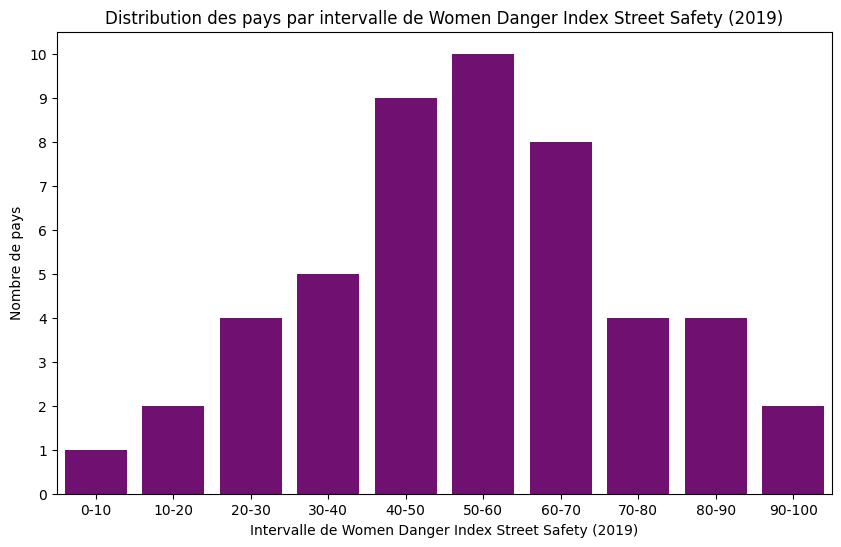

In [34]:
bins = [0, 10 ,20, 30, 40, 50, 60, 70 ,80,90,100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50' ,'50-60', '60-70', '70-80', '80-90', '90-100']
# Ajouter une colonne 'interval' au DataFrame en utilisant pd.cut()
women_dangerstreetsafety_2019['interval'] = pd.cut(women_dangerstreetsafety_2019["WDIStreetSafety_2019"], bins=bins, labels=labels, right=False)

# Compter le nombre de pays dans chaque intervalle
interval_counts = women_dangerstreetsafety_2019['interval'].value_counts().sort_index()

# Créer un graphique à barres sans `hue`
plt.figure(figsize=(10, 6))
sns.barplot(x=interval_counts.index, y=interval_counts.values, color="purple")

# Ajouter des labels et un titre
plt.xlabel("Intervalle de Women Danger Index Street Safety (2019)")
plt.ylabel("Nombre de pays")
plt.yticks(range(0, int(interval_counts.values.max()) + 1, 1))
plt.title("Distribution des pays par intervalle de Women Danger Index Street Safety (2019)")

# Afficher le graphique
plt.show()

In [35]:
# Filtrer pour les pays avec un indice inférieur à 30
data_exclude_interval = women_dangerstreetsafety_2019.drop(columns=["interval"], errors='ignore')
indice_less_30 = data_exclude_interval[women_dangerstreetsafety_2019["WDIStreetSafety_2019"] < 30]

indice_less_30.sort_values(by="WDIStreetSafety_2019", ascending=True)

,country,continent,WDIStreetSafety_2019
112,Singapore,Asia,9.0
98,Switzerland,Europe,15.0
116,Norway,Europe,16.0
1,China,Asia,23.0
31,Spain,Europe,24.0
96,Austria,Europe,27.0
111,Denmark,Europe,28.0


In [36]:
# Filtrer pour les pays avec un indice compris entre 30 & 50 
data_exclude_interval = women_dangerstreetsafety_2019.drop(columns=["interval"], errors='ignore')
indice_between_30_50 = data_exclude_interval[(women_dangerstreetsafety_2019["WDIStreetSafety_2019"] > 30) & 
                    (women_dangerstreetsafety_2019["WDIStreetSafety_2019"] <=50)]
indice_between_30_50.sort_values(by="WDIStreetSafety_2019", ascending=True)


,country,continent,WDIStreetSafety_2019
20,United Kingdom,Europe,31.0
69,Netherlands,Europe,32.0
121,Ireland,Europe,35.0
37,Canada,Americas,35.0
3,Indonesia,Asia,37.0
22,France,Europe,40.0
0,India,Asia,41.0
18,Germany,Europe,41.0
127,Croatia,Europe,43.0
87,Sweden,Europe,44.0


In [37]:
# Filtrer pour les pays avec un indice compris entre 50 & 70 
data_exclude_interval = women_dangerstreetsafety_2019.drop(columns=["interval"], errors='ignore')
indice_between_50_70 = data_exclude_interval[(women_dangerstreetsafety_2019["WDIStreetSafety_2019"] > 50) & 
                    (women_dangerstreetsafety_2019["WDIStreetSafety_2019"] <=70)]
indice_between_50_70.sort_values(by="WDIStreetSafety_2019", ascending=True)


,country,continent,WDIStreetSafety_2019
2,United States,Americas,51.0
28,South Korea,Asia,51.0
84,United Arab Emirates,Asia,51.0
38,Poland,Europe,53.0
13,Philippines,Asia,55.0
47,Saudi Arabia,Asia,56.0
54,Australia,Oceania,57.0
93,Hungary,Europe,57.0
39,Morocco,Africa,59.0
24,Italy,Europe,59.0


In [38]:
# Filtrer pour les pays avec un indice supérieur à 70
data_exclude_interval = women_dangerstreetsafety_2019.drop(columns=["interval"], errors='ignore')
indice_more_30 = data_exclude_interval[women_dangerstreetsafety_2019["WDIStreetSafety_2019"] > 70]

indice_more_30.sort_values(by="WDIStreetSafety_2019", ascending=True)

,country,continent,WDIStreetSafety_2019
12,Egypt,Africa,71.0
92,Greece,Europe,71.0
43,Malaysia,Asia,72.0
17,Turkey,Asia,72.0
64,Chile,Americas,81.0
41,Ukraine,Europe,81.0
10,Mexico,Americas,89.0
83,Dominican Republic,Americas,89.0
34,Argentina,Americas,92.0
6,Brazil,Americas,96.0


## Visualisation de WDIIntentionalHomicide_2019

In [39]:
women_homicide_2019 = pd.DataFrame(data_update, columns=["country", "continent", "WDIIntentionalHomicide_2019"])
women_homicide_2019.sort_values(by="WDIIntentionalHomicide_2019", ascending = False).head(10)

,country,continent,WDIIntentionalHomicide_2019
23,South Africa,Africa,100.0
8,Russia,Europe,77.0
10,Mexico,Americas,49.0
6,Brazil,Americas,49.0
83,Dominican Republic,Americas,35.0
0,India,Asia,30.0
41,Ukraine,Europe,27.0
13,Philippines,Asia,25.0
2,United States,Americas,25.0
34,Argentina,Americas,19.0


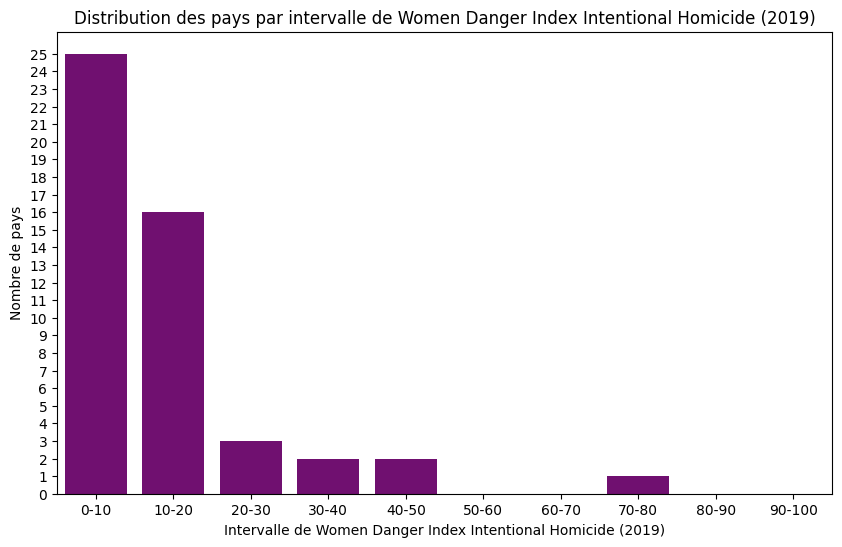

In [40]:
bins = [0, 10 ,20, 30, 40, 50, 60, 70 ,80,90,100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50' ,'50-60', '60-70', '70-80', '80-90', '90-100']
# Ajouter une colonne 'interval' au DataFrame en utilisant pd.cut()
women_homicide_2019['interval'] = pd.cut(women_homicide_2019["WDIIntentionalHomicide_2019"], bins=bins, labels=labels, right=False)

# Compter le nombre de pays dans chaque intervalle
interval_counts = women_homicide_2019['interval'].value_counts().sort_index()

# Créer un graphique à barres sans `hue`
plt.figure(figsize=(10, 6))
sns.barplot(x=interval_counts.index, y=interval_counts.values, color="purple")

# Ajouter des labels et un titre
plt.xlabel("Intervalle de Women Danger Index Intentional Homicide (2019)")
plt.ylabel("Nombre de pays")
plt.yticks(range(0, int(interval_counts.values.max()) + 1, 1))
plt.title("Distribution des pays par intervalle de Women Danger Index Intentional Homicide (2019)")

# Afficher le graphique
plt.show()

In [41]:
# Filtrer pour les pays avec un indice inférieur à 10
data_exclude_interval = women_homicide_2019.drop(columns=["interval"], errors='ignore')
indice_less_10 = data_exclude_interval[women_homicide_2019["WDIIntentionalHomicide_2019"] < 10]

indice_less_10.sort_values(by="WDIIntentionalHomicide_2019", ascending=True)

,country,continent,WDIIntentionalHomicide_2019
3,Indonesia,Asia,3.0
11,Japan,Asia,3.0
69,Netherlands,Europe,4.0
38,Poland,Europe,4.0
121,Ireland,Europe,4.0
31,Spain,Europe,5.0
24,Italy,Europe,5.0
15,Vietnam,Asia,5.0
116,Norway,Europe,5.0
112,Singapore,Asia,5.0


In [42]:
# Filtrer pour les pays avec un indice entre 10 & 20 
data_exclude_interval = women_homicide_2019.drop(columns=["interval"], errors='ignore')
indice_between_10_20 = data_exclude_interval[(women_homicide_2019["WDIIntentionalHomicide_2019"] > 10) &
                                        (women_homicide_2019["WDIIntentionalHomicide_2019"] <=20)]


indice_between_10_20.sort_values(by="WDIIntentionalHomicide_2019", ascending=True)

,country,continent,WDIIntentionalHomicide_2019
16,Iran,Asia,11.0
64,Chile,Americas,11.0
78,Tunisia,Africa,11.0
22,France,Europe,12.0
18,Germany,Europe,12.0
47,Saudi Arabia,Asia,13.0
84,United Arab Emirates,Asia,13.0
19,Thailand,Asia,13.0
149,Bahrain,Asia,14.0
81,Belgium,Europe,16.0


In [43]:
# Filtrer pour les pays avec un indice entre 20 & 50 
data_exclude_interval = women_homicide_2019.drop(columns=["interval"], errors='ignore')
indice_between_20_50 = data_exclude_interval[(women_homicide_2019["WDIIntentionalHomicide_2019"] > 20) &
                                        (women_homicide_2019["WDIIntentionalHomicide_2019"] <=50)]


indice_between_20_50.sort_values(by="WDIIntentionalHomicide_2019", ascending=True)

,country,continent,WDIIntentionalHomicide_2019
2,United States,Americas,25.0
13,Philippines,Asia,25.0
41,Ukraine,Europe,27.0
0,India,Asia,30.0
83,Dominican Republic,Americas,35.0
6,Brazil,Americas,49.0
10,Mexico,Americas,49.0


In [44]:
# Filtrer pour les pays avec un indice supérieur à 50 
data_exclude_interval = women_homicide_2019.drop(columns=["interval"], errors='ignore')
indice_more_50 = data_exclude_interval[women_homicide_2019["WDIIntentionalHomicide_2019"] > 50]

indice_more_50.sort_values(by="WDIIntentionalHomicide_2019", ascending=True)

,country,continent,WDIIntentionalHomicide_2019
8,Russia,Europe,77.0
23,South Africa,Africa,100.0


## Visualisation de WDINonPartnerViolence_2019

In [45]:
women_nonpartner_2019 = pd.DataFrame(data_update, columns=["country", "continent","WDINonPartnerViolence_2019"])
women_nonpartner_2019.sort_values(by="WDINonPartnerViolence_2019", ascending = False).head(10)

,country,continent,WDINonPartnerViolence_2019
23,South Africa,Africa,100.0
54,Australia,Oceania,95.0
10,Mexico,Americas,88.0
2,United States,Americas,75.0
37,Canada,Americas,75.0
1,China,Asia,70.0
11,Japan,Asia,70.0
28,South Korea,Asia,70.0
69,Netherlands,Europe,69.0
87,Sweden,Europe,69.0


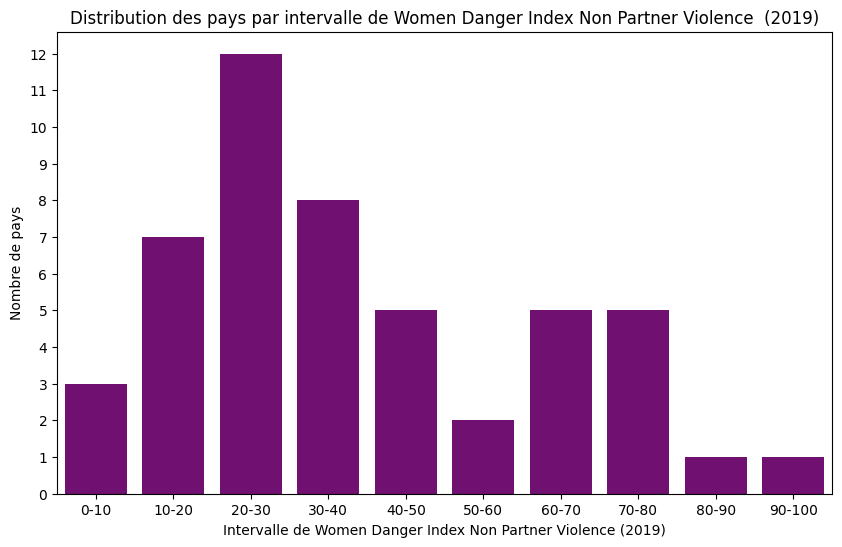

In [46]:
bins = [0, 10 ,20, 30, 40, 50, 60, 70 ,80,90,100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50' ,'50-60', '60-70', '70-80', '80-90', '90-100']
# Ajouter une colonne 'interval' au DataFrame en utilisant pd.cut()
women_nonpartner_2019['interval'] = pd.cut(women_nonpartner_2019["WDINonPartnerViolence_2019"], bins=bins, labels=labels, right=False)

# Compter le nombre de pays dans chaque intervalle
interval_counts = women_nonpartner_2019['interval'].value_counts().sort_index()

# Créer un graphique à barres sans `hue`
plt.figure(figsize=(10, 6))
sns.barplot(x=interval_counts.index, y=interval_counts.values, color="purple")

# Ajouter des labels et un titre
plt.xlabel("Intervalle de Women Danger Index Non Partner Violence (2019)")
plt.ylabel("Nombre de pays")
plt.yticks(range(0, int(interval_counts.values.max()) + 1, 1))
plt.title("Distribution des pays par intervalle de Women Danger Index Non Partner Violence  (2019)")

# Afficher le graphique
plt.show()

In [47]:
# Filtrer pour les pays avec un indice inférieur à 10
data_exclude_interval =  women_nonpartner_2019.drop(columns=["interval"], errors='ignore')
indice_less_10 =  data_exclude_interval[ women_nonpartner_2019["WDINonPartnerViolence_2019"] < 10]

indice_less_10.sort_values(by="WDINonPartnerViolence_2019", ascending=True)

,country,continent,WDINonPartnerViolence_2019
41,Ukraine,Europe,6.0
90,Portugal,Europe,6.0
92,Greece,Europe,6.0


In [48]:
# Filtrer pour les pays avec un indice inférieur entre 10 & 20 
data_exclude_interval =  women_nonpartner_2019.drop(columns=["interval"], errors='ignore')
indice_between_10_20 =  data_exclude_interval[ (women_nonpartner_2019["WDINonPartnerViolence_2019"] > 10) &
                                        (women_nonpartner_2019["WDINonPartnerViolence_2019"] <= 20)]

indice_between_10_20.sort_values(by="WDINonPartnerViolence_2019", ascending=True)

,country,continent,WDINonPartnerViolence_2019
15,Vietnam,Asia,11.0
38,Poland,Europe,11.0
31,Spain,Europe,17.0
93,Hungary,Europe,17.0
127,Croatia,Europe,17.0
0,India,Asia,19.0
112,Singapore,Asia,19.0


In [49]:
# Filtrer pour les pays avec un indice inférieur entre 20 & 30 
data_exclude_interval =  women_nonpartner_2019.drop(columns=["interval"], errors='ignore')
indice_between_20_30 =  data_exclude_interval[ (women_nonpartner_2019["WDINonPartnerViolence_2019"] > 20) &
                                        (women_nonpartner_2019["WDINonPartnerViolence_2019"] <= 30)]

indice_between_20_30.sort_values(by="WDINonPartnerViolence_2019", ascending=True)

,country,continent,WDINonPartnerViolence_2019
86,Czech Republic,NaN,23.0
96,Austria,Europe,23.0
71,Cambodia,Asia,23.0
12,Egypt,Africa,26.0
78,Tunisia,Africa,26.0
16,Iran,Asia,26.0
39,Morocco,Africa,26.0
17,Turkey,Asia,26.0
84,United Arab Emirates,Asia,26.0
149,Bahrain,Asia,26.0


In [50]:
# Filtrer pour les pays avec un indice inférieur entre 30 & 50 
data_exclude_interval =  women_nonpartner_2019.drop(columns=["interval"], errors='ignore')
indice_between_30_50 =  data_exclude_interval[ (women_nonpartner_2019["WDINonPartnerViolence_2019"] > 30) &
                                        (women_nonpartner_2019["WDINonPartnerViolence_2019"] <= 50)]

indice_between_30_50.sort_values(by="WDINonPartnerViolence_2019", ascending=True)

,country,continent,WDINonPartnerViolence_2019
64,Chile,Americas,34.0
107,Bulgaria,Europe,34.0
34,Argentina,Americas,34.0
8,Russia,Europe,40.0
18,Germany,Europe,40.0
20,United Kingdom,Europe,40.0
6,Brazil,Americas,44.0
81,Belgium,Europe,46.0


In [51]:
# Filtrer pour les pays avec un indice supérieur à 50 
data_exclude_interval =  women_nonpartner_2019.drop(columns=["interval"], errors='ignore')
indice_more_50 =  data_exclude_interval[ women_nonpartner_2019["WDINonPartnerViolence_2019"] > 50]

indice_more_50.sort_values(by="WDINonPartnerViolence_2019", ascending=True)

,country,continent,WDINonPartnerViolence_2019
22,France,Europe,52.0
83,Dominican Republic,Americas,59.0
111,Denmark,Europe,63.0
98,Switzerland,Europe,66.0
116,Norway,Europe,66.0
69,Netherlands,Europe,69.0
87,Sweden,Europe,69.0
1,China,Asia,70.0
11,Japan,Asia,70.0
28,South Korea,Asia,70.0


## Visulation de WDIIntimatePartnerViolence_2019

In [52]:
women_partner_2019 = pd.DataFrame(data_update, columns=["country","continent", "WDIIntimatePartnerViolence_2019"])
women_partner_2019.sort_values(by="WDIIntimatePartnerViolence_2019", ascending = False).head(10)

,country,continent,WDIIntimatePartnerViolence_2019
39,Morocco,Africa,100.0
19,Thailand,Asia,98.0
1,China,Asia,86.0
17,Turkey,Asia,84.0
0,India,Asia,83.0
6,Brazil,Americas,82.0
2,United States,Americas,81.0
64,Chile,Americas,79.0
15,Vietnam,Asia,76.0
34,Argentina,Americas,73.0


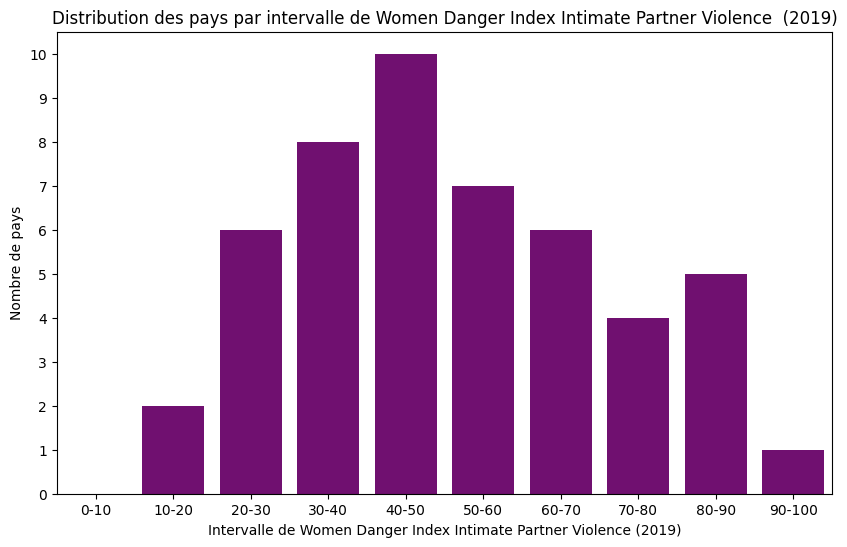

In [53]:
bins = [0, 10 ,20, 30, 40, 50, 60, 70 ,80,90,100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50' ,'50-60', '60-70', '70-80', '80-90', '90-100']
# Ajouter une colonne 'interval' au DataFrame en utilisant pd.cut()
women_partner_2019['interval'] = pd.cut(women_partner_2019["WDIIntimatePartnerViolence_2019"], bins=bins, labels=labels, right=False)

# Compter le nombre de pays dans chaque intervalle
interval_counts = women_partner_2019['interval'].value_counts().sort_index()

# Créer un graphique à barres sans `hue`
plt.figure(figsize=(10, 6))
sns.barplot(x=interval_counts.index, y=interval_counts.values, color="purple")

# Ajouter des labels et un titre
plt.xlabel("Intervalle de Women Danger Index Intimate Partner Violence (2019)")
plt.ylabel("Nombre de pays")
plt.yticks(range(0, int(interval_counts.values.max()) + 1, 1))
plt.title("Distribution des pays par intervalle de Women Danger Index Intimate Partner Violence  (2019)")

# Afficher le graphique
plt.show()

In [54]:
# Filtrer pour les pays avec un indice inférieur à 50 
data_exclude_interval =  women_partner_2019.drop(columns=["interval"], errors='ignore')
indice_less_50 =  data_exclude_interval[ women_partner_2019["WDIIntimatePartnerViolence_2019"] <= 50]

indice_less_50.sort_values(by="WDIIntimatePartnerViolence_2019", ascending=True)

,country,continent,WDIIntimatePartnerViolence_2019
37,Canada,Americas,14.0
112,Singapore,Asia,14.0
98,Switzerland,Europe,22.0
31,Spain,Europe,29.0
127,Croatia,Europe,29.0
96,Austria,Europe,29.0
38,Poland,Europe,29.0
41,Ukraine,Europe,29.0
84,United Arab Emirates,Asia,30.0
149,Bahrain,Asia,30.0


In [55]:
# Filtrer pour les pays avec un indice supérieur à 50 
data_exclude_interval =  women_partner_2019.drop(columns=["interval"], errors='ignore')
indice_more_50 =  data_exclude_interval[ women_partner_2019["WDIIntimatePartnerViolence_2019"] > 50]

indice_more_50.sort_values(by="WDIIntimatePartnerViolence_2019", ascending=True)

,country,continent,WDIIntimatePartnerViolence_2019
81,Belgium,Europe,53.0
23,South Africa,Africa,56.0
69,Netherlands,Europe,56.0
12,Egypt,Africa,58.0
22,France,Europe,58.0
16,Iran,Asia,59.0
47,Saudi Arabia,Asia,60.0
87,Sweden,Europe,62.0
116,Norway,Europe,62.0
20,United Kingdom,Europe,64.0


## Visulation de WDILegalDiscrimination_2019

In [56]:
women_legaldiscriminate_2019 = pd.DataFrame(data_update, columns=["country", "continent","WDILegalDiscrimination_2019"])
women_legaldiscriminate_2019.sort_values(by="WDILegalDiscrimination_2019", ascending = False).head(10)

,country,continent,WDILegalDiscrimination_2019
47,Saudi Arabia,Asia,100.0
84,United Arab Emirates,Asia,87.0
16,Iran,Asia,85.0
149,Bahrain,Asia,81.0
43,Malaysia,Asia,69.0
12,Egypt,Africa,65.0
78,Tunisia,Africa,59.0
3,Indonesia,Asia,54.0
8,Russia,Europe,50.0
112,Singapore,Asia,46.0


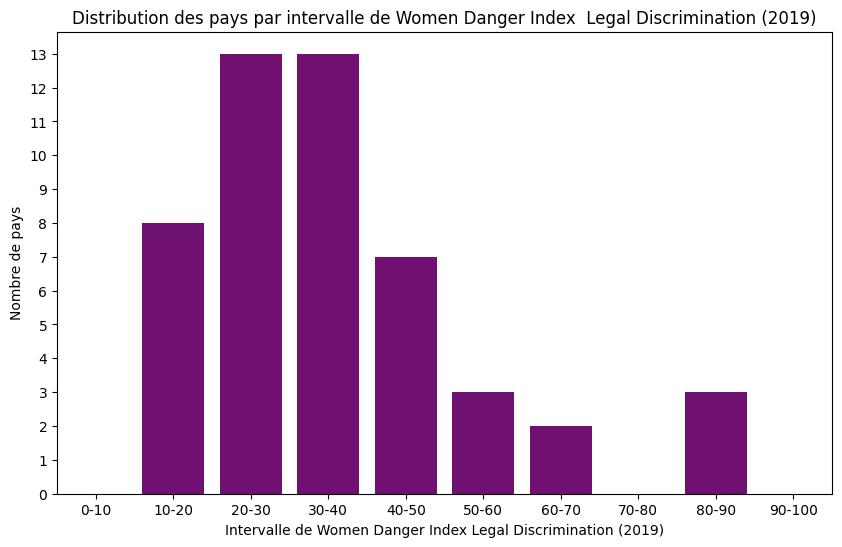

In [57]:
bins = [0, 10 ,20, 30, 40, 50, 60, 70 ,80,90,100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50' ,'50-60', '60-70', '70-80', '80-90', '90-100']
# Ajouter une colonne 'interval' au DataFrame en utilisant pd.cut()
women_legaldiscriminate_2019['interval'] = pd.cut(women_legaldiscriminate_2019["WDILegalDiscrimination_2019"], bins=bins, labels=labels, right=False)

# Compter le nombre de pays dans chaque intervalle
interval_counts = women_legaldiscriminate_2019['interval'].value_counts().sort_index()

# Créer un graphique à barres sans `hue`
plt.figure(figsize=(10, 6))
sns.barplot(x=interval_counts.index, y=interval_counts.values, color="purple")

# Ajouter des labels et un titre
plt.xlabel("Intervalle de Women Danger Index Legal Discrimination (2019)")
plt.ylabel("Nombre de pays")
plt.yticks(range(0, int(interval_counts.values.max()) + 1, 1))
plt.title("Distribution des pays par intervalle de Women Danger Index  Legal Discrimination (2019)")

# Afficher le graphique
plt.show()

In [58]:
# Filtrer pour les pays avec un indice inférieur à 30
data_exclude_interval =  women_legaldiscriminate_2019.drop(columns=["interval"], errors='ignore')
indice_less_30 =  data_exclude_interval[women_legaldiscriminate_2019["WDILegalDiscrimination_2019"] <= 30]

indice_less_30.sort_values(by="WDILegalDiscrimination_2019", ascending=True)

,country,continent,WDILegalDiscrimination_2019
20,United Kingdom,Europe,15.0
10,Mexico,Americas,15.0
31,Spain,Europe,15.0
22,France,Europe,17.0
54,Australia,Oceania,17.0
90,Portugal,Europe,17.0
93,Hungary,Europe,19.0
121,Ireland,Europe,19.0
28,South Korea,Asia,20.0
69,Netherlands,Europe,20.0


In [59]:
# Filtrer pour les pays avec un indice inférieur entre 30 & 50 
data_exclude_interval =  women_legaldiscriminate_2019.drop(columns=["interval"], errors='ignore')
indice_between_30_50 =  data_exclude_interval[ (women_legaldiscriminate_2019["WDILegalDiscrimination_2019"] > 30) &
                                        (women_legaldiscriminate_2019["WDILegalDiscrimination_2019"] <= 50)]

indice_between_30_50.sort_values(by="WDILegalDiscrimination_2019", ascending=True)

,country,continent,WDILegalDiscrimination_2019
13,Philippines,Asia,31.0
37,Canada,Americas,31.0
111,Denmark,Europe,31.0
11,Japan,Asia,37.0
15,Vietnam,Asia,37.0
64,Chile,Americas,39.0
18,Germany,Europe,39.0
17,Turkey,Asia,41.0
41,Ukraine,Europe,41.0
19,Thailand,Asia,41.0


In [60]:
# Filtrer pour les pays avec un indice supérieur à 50 
data_exclude_interval =  women_legaldiscriminate_2019.drop(columns=["interval"], errors='ignore')
indice_more_50 =  data_exclude_interval[ women_legaldiscriminate_2019["WDILegalDiscrimination_2019"] > 50]

indice_more_50.sort_values(by="WDILegalDiscrimination_2019", ascending=True)

,country,continent,WDILegalDiscrimination_2019
3,Indonesia,Asia,54.0
78,Tunisia,Africa,59.0
12,Egypt,Africa,65.0
43,Malaysia,Asia,69.0
149,Bahrain,Asia,81.0
16,Iran,Asia,85.0
84,United Arab Emirates,Asia,87.0
47,Saudi Arabia,Asia,100.0


## Visualisation de WDIGlobalGenderGap_2019

In [61]:
women_gendergap_2019 = pd.DataFrame(data_update, columns=["country", "continent","WDIGlobalGenderGap_2019"])
women_gendergap_2019.sort_values(by="WDIGlobalGenderGap_2019", ascending = False).head(10)

,country,continent,WDIGlobalGenderGap_2019
16,Iran,Asia,100.0
47,Saudi Arabia,Asia,100.0
39,Morocco,Africa,96.0
12,Egypt,Africa,94.0
17,Turkey,Asia,90.0
149,Bahrain,Asia,88.0
78,Tunisia,Africa,84.0
84,United Arab Emirates,Asia,84.0
28,South Korea,Asia,84.0
11,Japan,Asia,82.0


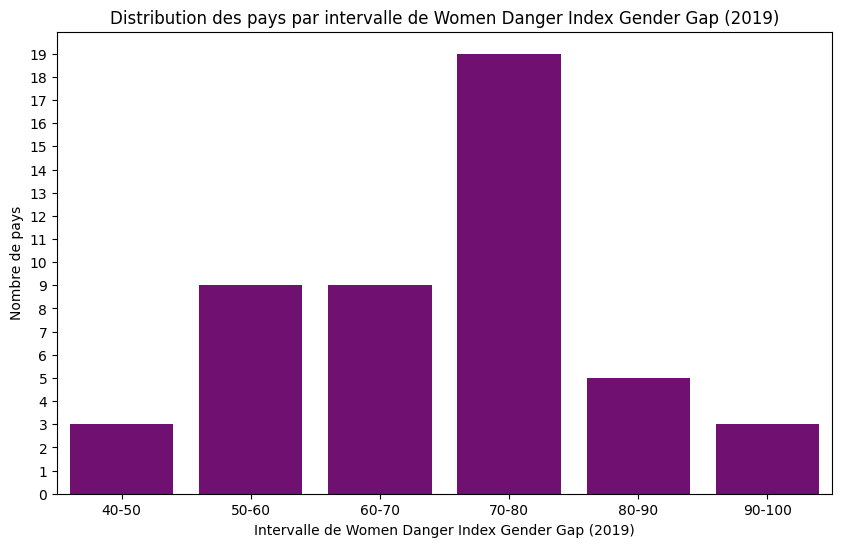

In [62]:
bins = [ 40, 50, 60, 70 ,80,90,100]
labels = ['40-50' ,'50-60', '60-70', '70-80', '80-90', '90-100']
# Ajouter une colonne 'interval' au DataFrame en utilisant pd.cut()
women_gendergap_2019['interval'] = pd.cut(women_gendergap_2019["WDIGlobalGenderGap_2019"], bins=bins, labels=labels, right=False)

# Compter le nombre de pays dans chaque intervalle
interval_counts = women_gendergap_2019 ['interval'].value_counts().sort_index()

# Créer un graphique à barres sans `hue`
plt.figure(figsize=(10, 6))
sns.barplot(x=interval_counts.index, y=interval_counts.values, color="purple")

# Ajouter des labels et un titre
plt.xlabel("Intervalle de Women Danger Index Gender Gap (2019)")
plt.ylabel("Nombre de pays")
plt.yticks(range(0, int(interval_counts.values.max()) + 1, 1))
plt.title("Distribution des pays par intervalle de Women Danger Index Gender Gap (2019)")

# Afficher le graphique
plt.show()

In [63]:
# Filtrer pour les pays avec un indice inférieur entre 40 & 60 
data_exclude_interval =  women_gendergap_2019.drop(columns=["interval"], errors='ignore')
indice_between_40_60 =  data_exclude_interval[ (women_gendergap_2019["WDIGlobalGenderGap_2019"] > 40) &
                                        (women_gendergap_2019["WDIGlobalGenderGap_2019"]<= 60)]

indice_between_40_60.sort_values(by="WDIGlobalGenderGap_2019", ascending=True)

,country,continent,WDIGlobalGenderGap_2019
116,Norway,Europe,41.0
87,Sweden,Europe,44.0
121,Ireland,Europe,49.0
13,Philippines,Asia,50.0
22,France,Europe,53.0
18,Germany,Europe,53.0
111,Denmark,Europe,54.0
20,United Kingdom,Europe,55.0
37,Canada,Americas,55.0
23,South Africa,Africa,59.0


In [64]:
# Filtrer pour les pays avec un indice inférieur entre 60 & 70 
data_exclude_interval =  women_gendergap_2019.drop(columns=["interval"], errors='ignore')
indice_between_40_60 =  data_exclude_interval[ (women_gendergap_2019["WDIGlobalGenderGap_2019"] > 60) &
                                        (women_gendergap_2019["WDIGlobalGenderGap_2019"]<= 70)]

indice_between_40_60.sort_values(by="WDIGlobalGenderGap_2019", ascending=True)

,country,continent,WDIGlobalGenderGap_2019
31,Spain,Europe,61.0
69,Netherlands,Europe,63.0
81,Belgium,Europe,63.0
34,Argentina,Americas,64.0
90,Portugal,Europe,64.0
38,Poland,Europe,65.0
54,Australia,Oceania,65.0
2,United States,Americas,68.0
127,Croatia,Europe,69.0
96,Austria,Europe,70.0


In [65]:
# Filtrer pour les pays avec un indice inférieur entre 60 & 70 
data_exclude_interval =  women_gendergap_2019.drop(columns=["interval"], errors='ignore')
indice_between_60_70 =  data_exclude_interval[ (women_gendergap_2019["WDIGlobalGenderGap_2019"] > 60) &
                                        (women_gendergap_2019["WDIGlobalGenderGap_2019"]<= 70)]

indice_between_60_70.sort_values(by="WDIGlobalGenderGap_2019", ascending=True)

,country,continent,WDIGlobalGenderGap_2019
31,Spain,Europe,61.0
69,Netherlands,Europe,63.0
81,Belgium,Europe,63.0
34,Argentina,Americas,64.0
90,Portugal,Europe,64.0
38,Poland,Europe,65.0
54,Australia,Oceania,65.0
2,United States,Americas,68.0
127,Croatia,Europe,69.0
96,Austria,Europe,70.0


In [66]:
# Filtrer pour les pays avec un indice inférieur entre 70 & 80 
data_exclude_interval =  women_gendergap_2019.drop(columns=["interval"], errors='ignore')
indice_between_70_80 =  data_exclude_interval[ (women_gendergap_2019["WDIGlobalGenderGap_2019"] > 70) &
                                        (women_gendergap_2019["WDIGlobalGenderGap_2019"]<= 80)]

indice_between_70_80.sort_values(by="WDIGlobalGenderGap_2019", ascending=True)

,country,continent,WDIGlobalGenderGap_2019
64,Chile,Americas,71.0
41,Ukraine,Europe,71.0
112,Singapore,Asia,71.0
15,Vietnam,Asia,72.0
19,Thailand,Asia,73.0
83,Dominican Republic,Americas,73.0
8,Russia,Europe,73.0
10,Mexico,Americas,74.0
92,Greece,Europe,74.0
24,Italy,Europe,74.0


In [67]:
# Filtrer pour les pays avec un indice supérieur à 80
data_exclude_interval =  women_gendergap_2019.drop(columns=["interval"], errors='ignore')
indice_more_80 =  data_exclude_interval[women_gendergap_2019["WDIGlobalGenderGap_2019"] > 80]

indice_more_80.sort_values(by="WDIGlobalGenderGap_2019", ascending=True)

,country,continent,WDIGlobalGenderGap_2019
11,Japan,Asia,82.0
28,South Korea,Asia,84.0
78,Tunisia,Africa,84.0
84,United Arab Emirates,Asia,84.0
149,Bahrain,Asia,88.0
17,Turkey,Asia,90.0
12,Egypt,Africa,94.0
39,Morocco,Africa,96.0
47,Saudi Arabia,Asia,100.0
16,Iran,Asia,100.0


## Visulation de WDIGenderInequality_2019

In [68]:
women_genderinegalite_2019 = pd.DataFrame(data_update, columns=["country","continent", "WDIGenderInequality_2019"])
women_genderinegalite_2019.sort_values(by="WDIGenderInequality_2019", ascending = False).head(10)

,country,continent,WDIGenderInequality_2019
0,India,Asia,100.0
39,Morocco,Africa,92.0
71,Cambodia,Asia,90.0
16,Iran,Asia,88.0
12,Egypt,Africa,86.0
3,Indonesia,Asia,86.0
83,Dominican Republic,Americas,86.0
13,Philippines,Asia,81.0
6,Brazil,Americas,78.0
19,Thailand,Asia,75.0


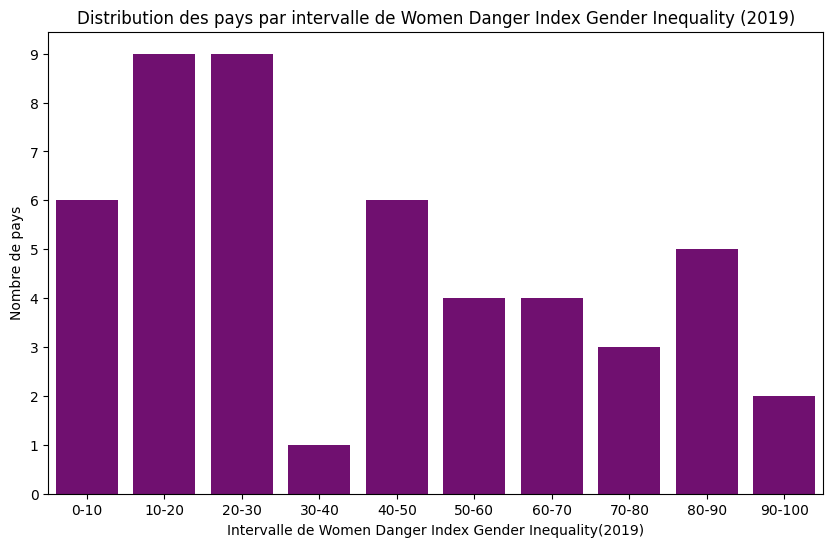

In [69]:
bins = [0, 10 ,20, 30, 40, 50, 60, 70 ,80,90,100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50' ,'50-60', '60-70', '70-80', '80-90', '90-100']
# Ajouter une colonne 'interval' au DataFrame en utilisant pd.cut()
women_genderinegalite_2019 ['interval'] = pd.cut(women_genderinegalite_2019["WDIGenderInequality_2019"], bins=bins, labels=labels, right=False)

# Compter le nombre de pays dans chaque intervalle
interval_counts = women_genderinegalite_2019 ['interval'].value_counts().sort_index()

# Créer un graphique à barres sans `hue`
plt.figure(figsize=(10, 6))
sns.barplot(x=interval_counts.index, y=interval_counts.values, color="purple")

# Ajouter des labels et un titre
plt.xlabel("Intervalle de Women Danger Index Gender Inequality(2019)")
plt.ylabel("Nombre de pays")
plt.yticks(range(0, int(interval_counts.values.max()) + 1, 1))
plt.title("Distribution des pays par intervalle de Women Danger Index Gender Inequality (2019)")

# Afficher le graphique
plt.show()

In [70]:
# Filtrer pour les pays avec un indice inférieur à 40
data_exclude_interval =  women_genderinegalite_2019.drop(columns=["interval"], errors='ignore')
indice_less_40 =  data_exclude_interval[women_genderinegalite_2019["WDIGenderInequality_2019"] < 40]

indice_less_40.sort_values(by="WDIGenderInequality_2019", ascending=True)

,country,continent,WDIGenderInequality_2019
98,Switzerland,Europe,7.0
69,Netherlands,Europe,8.0
111,Denmark,Europe,8.0
87,Sweden,Europe,8.0
81,Belgium,Europe,9.0
116,Norway,Europe,9.0
28,South Korea,Asia,12.0
112,Singapore,Asia,13.0
18,Germany,Europe,14.0
96,Austria,Europe,14.0


In [71]:
# Filtrer pour les pays avec un indice inférieur entre 40 & 50 
data_exclude_interval =  women_genderinegalite_2019.drop(columns=["interval"], errors='ignore')
indice_between_40_50 =  data_exclude_interval[ (women_genderinegalite_2019["WDIGenderInequality_2019"] > 40) &
                                        (women_genderinegalite_2019["WDIGenderInequality_2019"]<= 50)]

indice_between_40_50.sort_values(by="WDIGenderInequality_2019", ascending=True)

,country,continent,WDIGenderInequality_2019
107,Bulgaria,Europe,41.0
149,Bahrain,Asia,42.0
84,United Arab Emirates,Asia,44.0
47,Saudi Arabia,Asia,45.0
93,Hungary,Europe,49.0
8,Russia,Europe,49.0


In [72]:
# Filtrer pour les pays avec un indice supérieur à 50 
data_exclude_interval =  women_genderinegalite_2019.drop(columns=["interval"], errors='ignore')
indice_more_50 =  data_exclude_interval[women_genderinegalite_2019["WDIGenderInequality_2019"] > 50]

indice_more_50.sort_values(by="WDIGenderInequality_2019", ascending=True)

,country,continent,WDIGenderInequality_2019
41,Ukraine,Europe,54.0
43,Malaysia,Asia,55.0
78,Tunisia,Africa,57.0
15,Vietnam,Asia,58.0
17,Turkey,Asia,60.0
64,Chile,Americas,61.0
10,Mexico,Americas,65.0
34,Argentina,Americas,68.0
23,South Africa,Africa,74.0
19,Thailand,Asia,75.0


## Visualisaton de WDIAttitudesTowardViolence_2019

In [73]:
women_atttoviolence_2019 = pd.DataFrame(data_update, columns=["country", "continent","WDIAttitudesTowardViolence_2019"])
women_atttoviolence_2019.sort_values(by="WDIAttitudesTowardViolence_2019", ascending = False).head(10)

,country,continent,WDIAttitudesTowardViolence_2019
19,Thailand,Asia,100.0
1,China,Asia,80.0
71,Cambodia,Asia,75.0
0,India,Asia,74.0
43,Malaysia,Asia,69.0
112,Singapore,Asia,67.0
12,Egypt,Africa,64.0
15,Vietnam,Asia,59.0
23,South Africa,Africa,56.0
39,Morocco,Africa,52.0


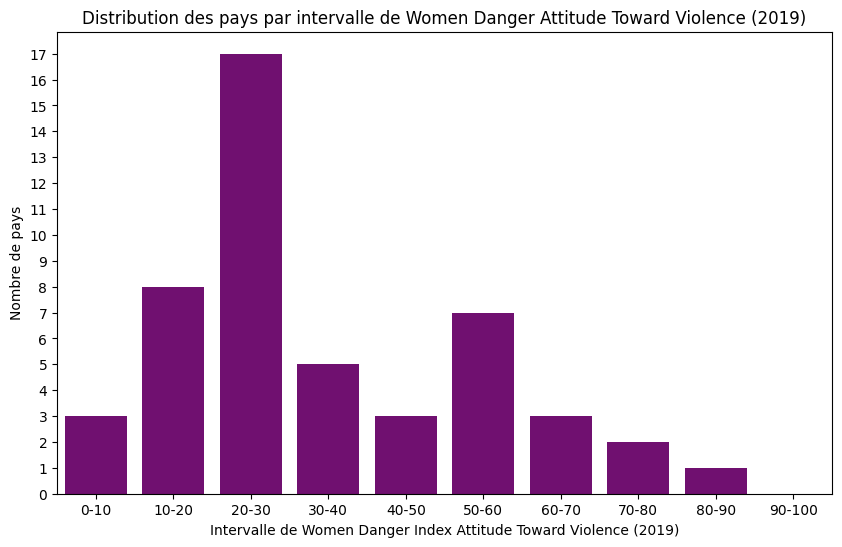

In [74]:
bins = [0, 10 ,20, 30, 40, 50, 60, 70 ,80,90,100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50' ,'50-60', '60-70', '70-80', '80-90', '90-100']
# Ajouter une colonne 'interval' au DataFrame en utilisant pd.cut()
women_atttoviolence_2019['interval'] = pd.cut(women_atttoviolence_2019["WDIAttitudesTowardViolence_2019"], bins=bins, labels=labels, right=False)

# Compter le nombre de pays dans chaque intervalle
interval_counts = women_atttoviolence_2019['interval'].value_counts().sort_index()

# Créer un graphique à barres sans `hue`
plt.figure(figsize=(10, 6))
sns.barplot(x=interval_counts.index, y=interval_counts.values, color="purple")

# Ajouter des labels et un titre
plt.xlabel("Intervalle de Women Danger Index Attitude Toward Violence (2019)")
plt.ylabel("Nombre de pays")
plt.yticks(range(0, int(interval_counts.values.max()) + 1, 1))
plt.title("Distribution des pays par intervalle de Women Danger Attitude Toward Violence (2019)")

# Afficher le graphique
plt.show()

In [75]:
# Filtrer pour les pays avec un indice inférieur à 30
data_exclude_interval =  women_atttoviolence_2019.drop(columns=["interval"], errors='ignore')
indice_less_30 =  data_exclude_interval[women_atttoviolence_2019["WDIAttitudesTowardViolence_2019"] < 30]

indice_less_30.sort_values(by="WDIAttitudesTowardViolence_2019", ascending=True)

,country,continent,WDIAttitudesTowardViolence_2019
54,Australia,Oceania,7.0
34,Argentina,Americas,7.0
83,Dominican Republic,Americas,7.0
37,Canada,Americas,10.0
24,Italy,Europe,11.0
22,France,Europe,11.0
93,Hungary,Europe,15.0
69,Netherlands,Europe,15.0
31,Spain,Europe,16.0
38,Poland,Europe,16.0


In [76]:
# Filtrer pour les pays avec un indice inférieur entre 30 & 70
data_exclude_interval =  women_genderinegalite_2019.drop(columns=["interval"], errors='ignore')
indice_between_30_70 =  data_exclude_interval[ (women_genderinegalite_2019["WDIGenderInequality_2019"] > 30) &
                                        (women_genderinegalite_2019["WDIGenderInequality_2019"]<= 70)]

indice_between_30_70.sort_values(by="WDIGenderInequality_2019", ascending=True)

,country,continent,WDIGenderInequality_2019
2,United States,Americas,36.0
107,Bulgaria,Europe,41.0
149,Bahrain,Asia,42.0
84,United Arab Emirates,Asia,44.0
47,Saudi Arabia,Asia,45.0
8,Russia,Europe,49.0
93,Hungary,Europe,49.0
41,Ukraine,Europe,54.0
43,Malaysia,Asia,55.0
78,Tunisia,Africa,57.0


In [77]:
# Filtrer pour les pays avec un indice supérieur à 50 
data_exclude_interval =  women_atttoviolence_2019.drop(columns=["interval"], errors='ignore')
indice_more_70 =  data_exclude_interval[women_atttoviolence_2019["WDIAttitudesTowardViolence_2019"] >= 70]

indice_more_70.sort_values(by="WDIAttitudesTowardViolence_2019", ascending=True)

,country,continent,WDIAttitudesTowardViolence_2019
0,India,Asia,74.0
71,Cambodia,Asia,75.0
1,China,Asia,80.0
19,Thailand,Asia,100.0


In [78]:
## Faire continent par continent

In [79]:
## Faire France par rapport à Europe

In [80]:
## Faire France par rapport à tous les continents

In [81]:
data_europe = data_update[data_update['continent'] == 'Europe']

In [82]:
# Toutes les colonnes nous intéresse sauf celle "continent"
data_europe = data_europe.drop(columns=['continent'])

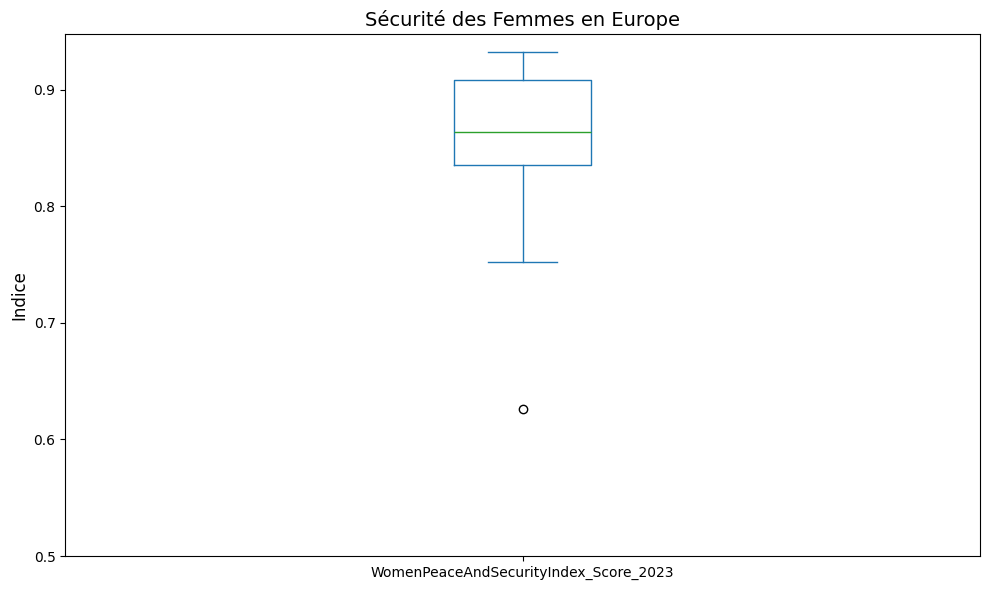

In [83]:

# Création du boxplot
plt.figure(figsize=(10, 6))

data_europe['WomenPeaceAndSecurityIndex_Score_2023'].plot.box()

# Ajout du titre et des labels
plt.title('Sécurité des Femmes en Europe', fontsize=14)
plt.ylabel('Indice', fontsize=12)
plt.yticks(np.arange(0.5, 1, 0.1))

# Affichage du graphique
plt.tight_layout()
plt.show()

In [84]:
# On remarque qu'un Pays semble avoir un score bien plus faible que la moyenne :
less_europe_secure = data_europe['WomenPeaceAndSecurityIndex_Score_2023'].min()
country_less_secure = data_europe[data_europe['WomenPeaceAndSecurityIndex_Score_2023'] == less_europe_secure]

# Afficher uniquement le nom du pays avec l'indice le plus faible
print(f"Le pays Européen ayant l'indice le plus faible est {country_less_secure['country'].iloc[0]} avec un score de {less_europe_secure}")


Le pays Européen ayant l'indice le plus faible est Ukraine avec un score de 0.626


In [85]:
data_asia = data_update[data_update['continent'] == 'Asia']
data_asia = data_asia.drop(columns=['continent'])

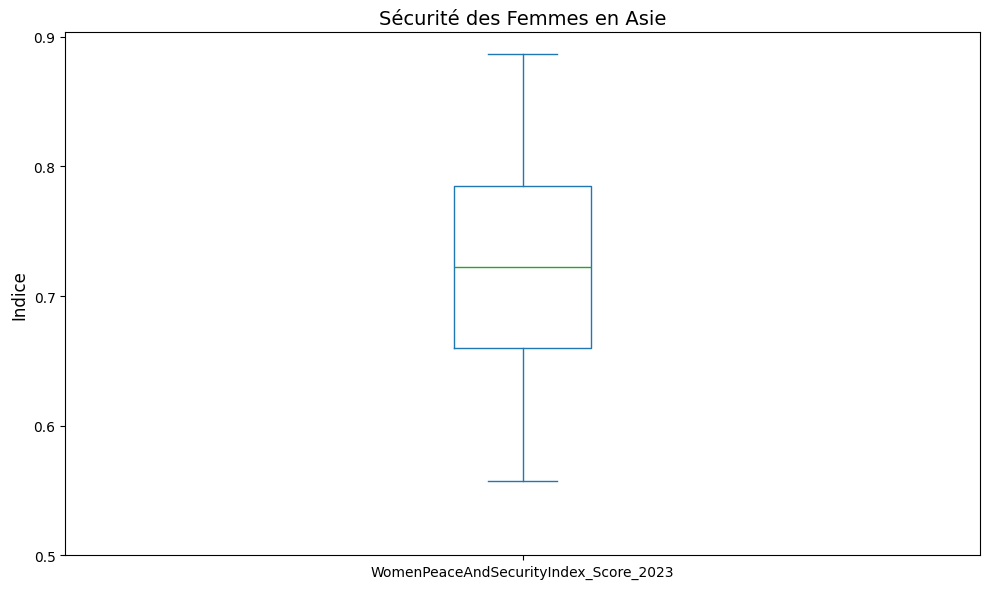

In [86]:

# Création du boxplot
plt.figure(figsize=(10, 6))

data_asia['WomenPeaceAndSecurityIndex_Score_2023'].plot.box()

# Ajout du titre et des labels
plt.title('Sécurité des Femmes en Asie', fontsize=14)
plt.ylabel('Indice', fontsize=12)
plt.yticks(np.arange(0.5, 1, 0.1))

# Affichage du graphique
plt.tight_layout()

In [87]:
less_asia_secure = data_asia['WomenPeaceAndSecurityIndex_Score_2023'].min()
country_asia_less_secure = data_asia[data_asia['WomenPeaceAndSecurityIndex_Score_2023'] == less_asia_secure]

# Afficher uniquement le nom du pays avec l'indice le plus faible
print(f"Le pays Asiatique ayant l'indice le plus faible est {country_asia_less_secure['country'].iloc[0]} avec un score de {less_asia_secure}")


Le pays Asiatique ayant l'indice le plus faible est Iran avec un score de 0.557


In [88]:
data_americas = data_update[data_update['continent'] == 'Americas']
data_americas = data_americas.drop(columns=['continent'])

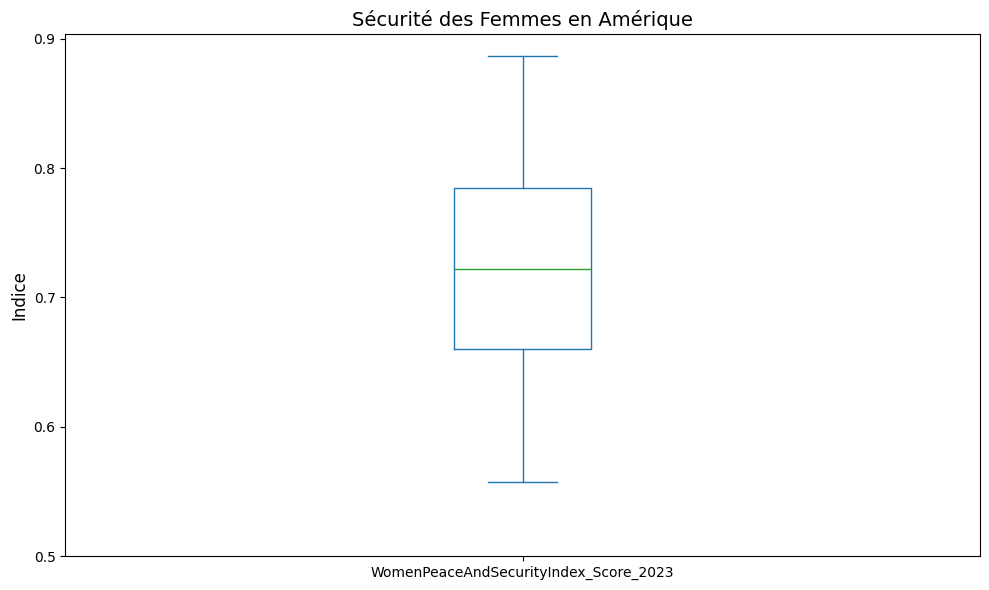

In [89]:

# Création du boxplot
plt.figure(figsize=(10, 6))

data_asia['WomenPeaceAndSecurityIndex_Score_2023'].plot.box()

# Ajout du titre et des labels
plt.title('Sécurité des Femmes en Amérique', fontsize=14)
plt.ylabel('Indice', fontsize=12)
plt.yticks(np.arange(0.5, 1, 0.1))

# Affichage du graphique
plt.tight_layout()

In [90]:
less_americas_secure = data_americas['WomenPeaceAndSecurityIndex_Score_2023'].min()
country_americas_less_secure = data_americas[data_americas['WomenPeaceAndSecurityIndex_Score_2023'] == less_americas_secure]

# Afficher uniquement le nom du pays avec l'indice le plus faible
print(f"Le pays Américain ayant l'indice le plus faible est {country_americas_less_secure['country'].iloc[0]} avec un score de {less_americas_secure}")

Le pays Américain ayant l'indice le plus faible est Mexico avec un score de 0.551


In [91]:
data_africa = data_update[data_update['continent'] == 'Africa']
data_africa = data_africa.drop(columns=['continent'])

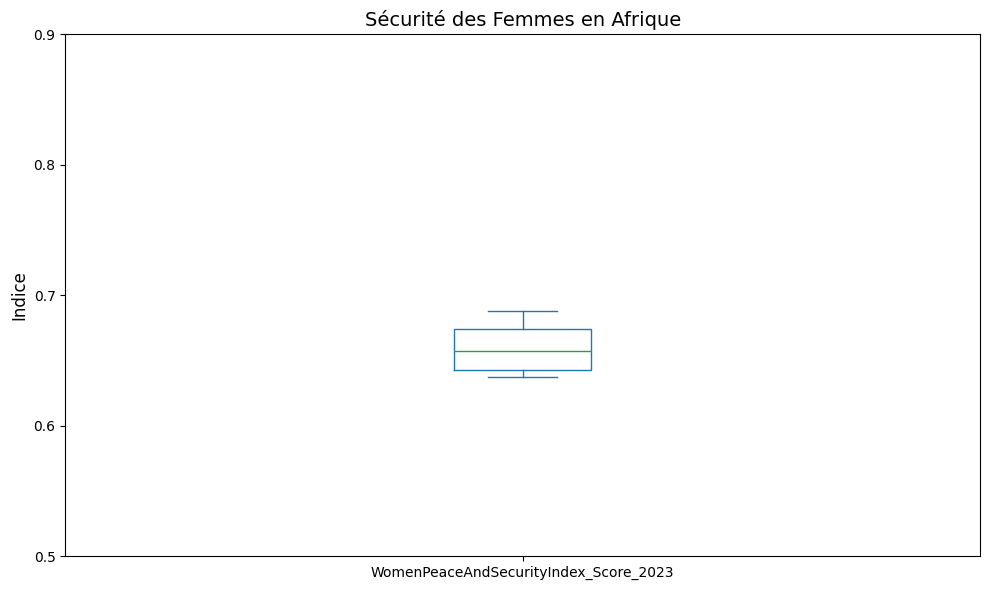

In [92]:

# Création du boxplot
plt.figure(figsize=(10, 6))

data_africa['WomenPeaceAndSecurityIndex_Score_2023'].plot.box()

# Ajout du titre et des labels
plt.title('Sécurité des Femmes en Afrique', fontsize=14)
plt.ylabel('Indice', fontsize=12)
plt.yticks(np.arange(0.5, 1, 0.1))

# Affichage du graphique
plt.tight_layout()

In [93]:
less_africa_secure = data_africa['WomenPeaceAndSecurityIndex_Score_2023'].min()
country_africa_less_secure = data_africa[data_africa['WomenPeaceAndSecurityIndex_Score_2023'] == less_africa_secure]

# Afficher uniquement le nom du pays avec l'indice le plus faible
print(f"Le pays Africain ayant l'indice le plus faible est {country_africa_less_secure['country'].iloc[0]} avec un score de {less_africa_secure}")

Le pays Africain ayant l'indice le plus faible est Morocco avec un score de 0.637


In [94]:
column_to_check = ['country', 'WDIStreetSafety_2019',
       'WDIIntentionalHomicide_2019', 'WDINonPartnerViolence_2019',
       'WDIIntimatePartnerViolence_2019', 'WDILegalDiscrimination_2019',
       'WDIGlobalGenderGap_2019', 'WDIGenderInequality_2019',
       'WDIAttitudesTowardViolence_2019']
data_europe_combined = data_europe[column_to_check]
data_americas_combined = data_americas[column_to_check]
data_asia_combined = data_asia[column_to_check]
data_africa_combined = data_africa[column_to_check]

<Figure size 3500x2500 with 0 Axes>

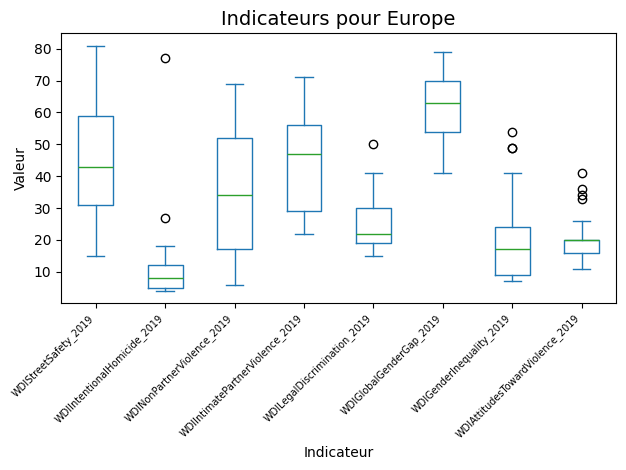

In [95]:
columns_to_plot = [
    'WDIStreetSafety_2019', 'WDIIntentionalHomicide_2019', 'WDINonPartnerViolence_2019',
    'WDIIntimatePartnerViolence_2019', 'WDILegalDiscrimination_2019', 'WDIGlobalGenderGap_2019',
    'WDIGenderInequality_2019', 'WDIAttitudesTowardViolence_2019'
]


# Fonction pour tracer des graphiques en barres pour chaque continent
def plot_continent_data(data, continent_name):
    data_for_plot = data[columns_to_plot]
    
    # Ajuster la taille de la figure pour un meilleur affichage
    plt.figure(figsize=(35, 25))  # Taille ajustée pour mieux afficher
    data_for_plot.plot.box()

    # Personnaliser l'affichage
    plt.title(f"Indicateurs pour {continent_name}", fontsize=14)
    plt.xlabel('Indicateur', fontsize=10)
    plt.ylabel('Valeur', fontsize=10)
    
    # Ajuster les labels de l'axe X pour éviter le chevauchement
    plt.xticks(rotation=45, ha="right", fontsize=7)  # Rotation des labels et ajustement de la taille

    # Ajouter plus de marges pour éviter les coupures
    plt.subplots_adjust(bottom=0.5)
    
    # Afficher le graphique
    plt.tight_layout()
    plt.show()

# Tracer les graphiques pour chaque continent
plot_continent_data(data_europe_combined, "Europe")


In [96]:
columns_to_plot = [
    'WDIStreetSafety_2019', 'WDIIntentionalHomicide_2019', 'WDINonPartnerViolence_2019',
    'WDIIntimatePartnerViolence_2019', 'WDILegalDiscrimination_2019', 'WDIGlobalGenderGap_2019',
    'WDIGenderInequality_2019', 'WDIAttitudesTowardViolence_2019'
]

max_europa_inthomicide = data_europe_combined.sort_values(by='WDIIntentionalHomicide_2019', ascending=False)
max_europa_inthomicide.head(2)




,country,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
8,Russia,69.0,77.0,40.0,47.0,50.0,73.0,49.0,41.0
41,Ukraine,81.0,27.0,6.0,29.0,41.0,71.0,54.0,36.0


In [97]:
max_europa_legaldiscrimination = data_europe_combined.sort_values(by='WDILegalDiscrimination_2019', ascending=False)
max_europa_legaldiscrimination.head(1)

,country,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
8,Russia,69.0,77.0,40.0,47.0,50.0,73.0,49.0,41.0


In [98]:
max_europa_inequalgender = data_europe_combined.sort_values(by='WDIGenderInequality_2019', ascending=False)
max_europa_inequalgender.head(2)

,country,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
41,Ukraine,81.0,27.0,6.0,29.0,41.0,71.0,54.0,36.0
93,Hungary,57.0,18.0,17.0,47.0,19.0,79.0,49.0,15.0


In [99]:
max_europa_atttoviolence = data_europe_combined.sort_values(by='WDIAttitudesTowardViolence_2019', ascending=False)
max_europa_atttoviolence.head(5)

,country,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
8,Russia,69.0,77.0,40.0,47.0,50.0,73.0,49.0,41.0
41,Ukraine,81.0,27.0,6.0,29.0,41.0,71.0,54.0,36.0
107,Bulgaria,61.0,7.0,34.0,47.0,30.0,59.0,41.0,34.0
18,Germany,41.0,12.0,40.0,49.0,39.0,53.0,14.0,33.0
98,Switzerland,15.0,7.0,66.0,22.0,30.0,59.0,7.0,26.0


<Figure size 3500x2500 with 0 Axes>

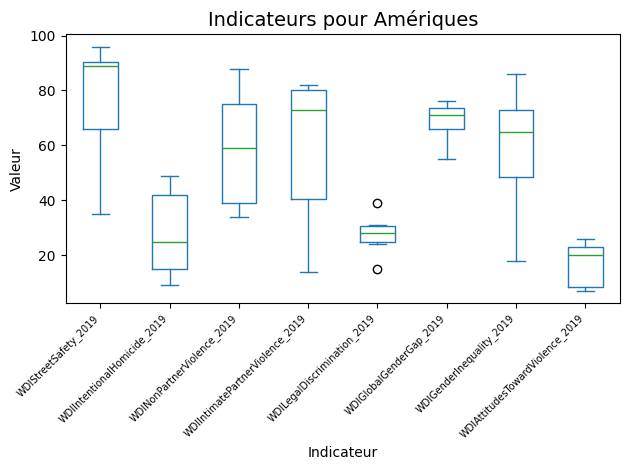

In [100]:
plot_continent_data(data_americas_combined, "Amériques")


In [101]:
max_americas_legaldiscrimination = data_americas_combined.sort_values(by='WDILegalDiscrimination_2019', ascending=False)
max_americas_legaldiscrimination.head(1)

,country,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
64,Chile,81.0,11.0,34.0,79.0,39.0,71.0,61.0,20.0


In [102]:
max_americas_legaldiscrimination = data_americas_combined.sort_values(by='WDILegalDiscrimination_2019', ascending=True)
max_americas_legaldiscrimination.head(1)

,country,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
10,Mexico,89.0,49.0,88.0,31.0,15.0,74.0,65.0,26.0


<Figure size 3500x2500 with 0 Axes>

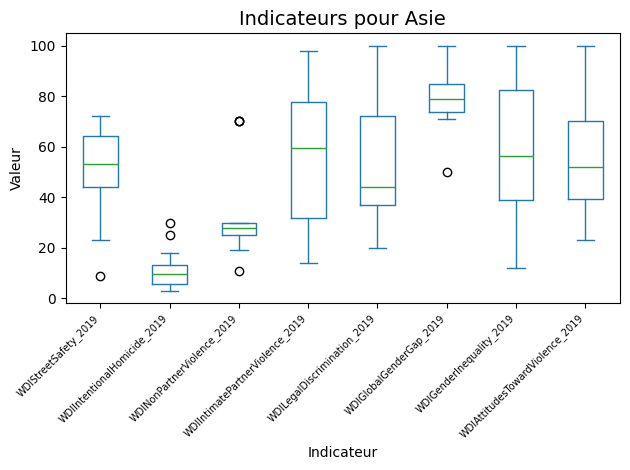

In [103]:
plot_continent_data(data_asia_combined, "Asie")


In [104]:
max_asia_gendergap = data_asia_combined.sort_values(by='WDIGlobalGenderGap_2019', ascending=False)
max_asia_gendergap.head(1)

,country,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
16,Iran,69.0,11.0,26.0,59.0,85.0,100.0,88.0,34.0


In [105]:
max_asia_streetsafety = data_asia_combined.sort_values(by='WDIStreetSafety_2019', ascending=False)
max_asia_streetsafety.head(1)

,country,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
17,Turkey,72.0,18.0,26.0,84.0,41.0,90.0,60.0,41.0


In [106]:
max_asia_nonpartnerviolence = data_asia_combined.sort_values(by='WDINonPartnerViolence_2019', ascending=False)
max_asia_nonpartnerviolence.head(1)

,country,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
1,China,23.0,6.0,70.0,86.0,44.0,78.0,29.0,80.0


In [107]:
min_asia_nonpartnerviolence = data_asia_combined.sort_values(by='WDINonPartnerViolence_2019', ascending=True)
min_asia_nonpartnerviolence.head(1)

,country,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
15,Vietnam,63.0,5.0,11.0,76.0,37.0,72.0,58.0,59.0


In [108]:
max_asia_inthomicide = data_asia_combined.sort_values(by='WDIIntentionalHomicide_2019', ascending=False)
max_asia_inthomicide.head(2)

,country,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
0,India,41.0,30.0,19.0,83.0,44.0,79.0,100.0,74.0
13,Philippines,55.0,25.0,30.0,32.0,31.0,50.0,81.0,23.0


<Figure size 3500x2500 with 0 Axes>

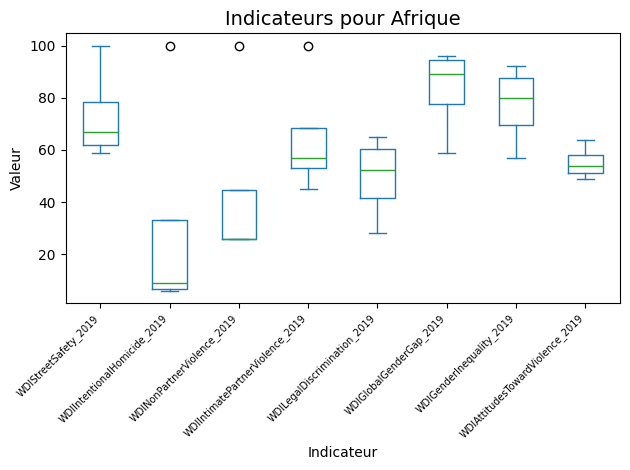

In [109]:
plot_continent_data(data_africa_combined, "Afrique")


In [110]:
max_africa_inthomicide = data_africa_combined.sort_values(by='WDIIntentionalHomicide_2019', ascending=False)
max_africa_inthomicide.head(1)

,country,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
23,South Africa,100.0,100.0,100.0,56.0,28.0,59.0,74.0,56.0


In [111]:
max_africa_nonpartnerviolence = data_africa_combined.sort_values(by='WDINonPartnerViolence_2019', ascending=False)
max_africa_nonpartnerviolence.head(1)

,country,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
23,South Africa,100.0,100.0,100.0,56.0,28.0,59.0,74.0,56.0


In [112]:
max_africa_intimatepartnerviolence = data_africa_combined.sort_values(by='WDIIntimatePartnerViolence_2019', ascending=False)
max_africa_intimatepartnerviolence.head(1)

,country,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
39,Morocco,59.0,6.0,26.0,100.0,46.0,96.0,92.0,52.0


In [113]:
# Liste des colonnes d'indicateurs, y compris la colonne 'country'
columns_to_check = [
    'country', 'WDIStreetSafety_2019', 'WDIIntentionalHomicide_2019', 'WDINonPartnerViolence_2019',
    'WDIIntimatePartnerViolence_2019', 'WDILegalDiscrimination_2019', 'WDIGlobalGenderGap_2019',
    'WDIGenderInequality_2019', 'WDIAttitudesTowardViolence_2019'
]

# Fonction pour trouver le pays avec les valeurs maximales et minimales par colonne
def find_extreme_values(data, continent_name):
    print(f"Analyse pour {continent_name}:")
    for column in columns_to_check[1:]:  # Ignorer la colonne 'country'
        # Trouver le pays avec la valeur maximale et minimale
        max_country_index = data[column].idxmax()  # Index du pays avec la valeur maximale
        min_country_index = data[column].idxmin()  # Index du pays avec la valeur minimale
        max_country = data.loc[max_country_index, 'country']  # Nom du pays avec la valeur maximale
        min_country = data.loc[min_country_index, 'country']  # Nom du pays avec la valeur minimale
        max_value = data[column].max()  # Valeur maximale
        min_value = data[column].min()  # Valeur minimale
        
        # Afficher les résultats pour chaque colonne
        print(f"{column}:")
        print(f"  Pays avec la valeur la plus haute: {max_country} ({max_value})")
        print(f"  Pays avec la valeur la plus basse: {min_country} ({min_value})")
        print()

# Analyser chaque continent
find_extreme_values(data_europe_combined, "Europe")


Analyse pour Europe:
WDIStreetSafety_2019:
  Pays avec la valeur la plus haute: Ukraine (81.0)
  Pays avec la valeur la plus basse: Switzerland (15.0)

WDIIntentionalHomicide_2019:
  Pays avec la valeur la plus haute: Russia (77.0)
  Pays avec la valeur la plus basse: Poland (4.0)

WDINonPartnerViolence_2019:
  Pays avec la valeur la plus haute: Netherlands (69.0)
  Pays avec la valeur la plus basse: Ukraine (6.0)

WDIIntimatePartnerViolence_2019:
  Pays avec la valeur la plus haute: Denmark (71.0)
  Pays avec la valeur la plus basse: Switzerland (22.0)

WDILegalDiscrimination_2019:
  Pays avec la valeur la plus haute: Russia (50.0)
  Pays avec la valeur la plus basse: United Kingdom (15.0)

WDIGlobalGenderGap_2019:
  Pays avec la valeur la plus haute: Hungary (79.0)
  Pays avec la valeur la plus basse: Norway (41.0)

WDIGenderInequality_2019:
  Pays avec la valeur la plus haute: Ukraine (54.0)
  Pays avec la valeur la plus basse: Switzerland (7.0)

WDIAttitudesTowardViolence_2019:
  P

In [114]:
find_extreme_values(data_americas_combined, "Amériques")


Analyse pour Amériques:
WDIStreetSafety_2019:
  Pays avec la valeur la plus haute: Brazil (96.0)
  Pays avec la valeur la plus basse: Canada (35.0)

WDIIntentionalHomicide_2019:
  Pays avec la valeur la plus haute: Brazil (49.0)
  Pays avec la valeur la plus basse: Canada (9.0)

WDINonPartnerViolence_2019:
  Pays avec la valeur la plus haute: Mexico (88.0)
  Pays avec la valeur la plus basse: Argentina (34.0)

WDIIntimatePartnerViolence_2019:
  Pays avec la valeur la plus haute: Brazil (82.0)
  Pays avec la valeur la plus basse: Canada (14.0)

WDILegalDiscrimination_2019:
  Pays avec la valeur la plus haute: Chile (39.0)
  Pays avec la valeur la plus basse: Mexico (15.0)

WDIGlobalGenderGap_2019:
  Pays avec la valeur la plus haute: Brazil (76.0)
  Pays avec la valeur la plus basse: Canada (55.0)

WDIGenderInequality_2019:
  Pays avec la valeur la plus haute: Dominican Republic (86.0)
  Pays avec la valeur la plus basse: Canada (18.0)

WDIAttitudesTowardViolence_2019:
  Pays avec la va

In [115]:
find_extreme_values(data_asia_combined, "Asie")

Analyse pour Asie:
WDIStreetSafety_2019:
  Pays avec la valeur la plus haute: Turkey (72.0)
  Pays avec la valeur la plus basse: Singapore (9.0)

WDIIntentionalHomicide_2019:
  Pays avec la valeur la plus haute: India (30.0)
  Pays avec la valeur la plus basse: Indonesia (3.0)

WDINonPartnerViolence_2019:
  Pays avec la valeur la plus haute: China (70.0)
  Pays avec la valeur la plus basse: Vietnam (11.0)

WDIIntimatePartnerViolence_2019:
  Pays avec la valeur la plus haute: Thailand (98.0)
  Pays avec la valeur la plus basse: Singapore (14.0)

WDILegalDiscrimination_2019:
  Pays avec la valeur la plus haute: Saudi Arabia (100.0)
  Pays avec la valeur la plus basse: South Korea (20.0)

WDIGlobalGenderGap_2019:
  Pays avec la valeur la plus haute: Iran (100.0)
  Pays avec la valeur la plus basse: Philippines (50.0)

WDIGenderInequality_2019:
  Pays avec la valeur la plus haute: India (100.0)
  Pays avec la valeur la plus basse: South Korea (12.0)

WDIAttitudesTowardViolence_2019:
  Pays

In [116]:
find_extreme_values(data_africa_combined, "Afrique")

Analyse pour Afrique:
WDIStreetSafety_2019:
  Pays avec la valeur la plus haute: South Africa (100.0)
  Pays avec la valeur la plus basse: Morocco (59.0)

WDIIntentionalHomicide_2019:
  Pays avec la valeur la plus haute: South Africa (100.0)
  Pays avec la valeur la plus basse: Morocco (6.0)

WDINonPartnerViolence_2019:
  Pays avec la valeur la plus haute: South Africa (100.0)
  Pays avec la valeur la plus basse: Egypt (26.0)

WDIIntimatePartnerViolence_2019:
  Pays avec la valeur la plus haute: Morocco (100.0)
  Pays avec la valeur la plus basse: Tunisia (45.0)

WDILegalDiscrimination_2019:
  Pays avec la valeur la plus haute: Egypt (65.0)
  Pays avec la valeur la plus basse: South Africa (28.0)

WDIGlobalGenderGap_2019:
  Pays avec la valeur la plus haute: Morocco (96.0)
  Pays avec la valeur la plus basse: South Africa (59.0)

WDIGenderInequality_2019:
  Pays avec la valeur la plus haute: Morocco (92.0)
  Pays avec la valeur la plus basse: Tunisia (57.0)

WDIAttitudesTowardViolence_